No API key found, continuing without..
Requesting https://www.googleapis.com/pagespeedonline/v5/runPagespeed?url=https://community.infineon.com&strategy=desktop...


{'captchaResult': 'CAPTCHA_NOT_NEEDED', 'kind': 'pagespeedonline#result', 'id': 'https://community.infineon.com/?profile.language=en', 'loadingExperience': {'id': 'https://community.infineon.com/', 'metrics': {'CUMULATIVE_LAYOUT_SHIFT_SCORE': {'percentile': 4, 'distributions': [{'min': 0, 'max': 10, 'proportion': 0.9416801666280954}, {'min': 10, 'max': 25, 'proportion': 0.05565841240453599}, {'min': 25, 'proportion': 0.0026614209673686646}], 'category': 'FAST'}, 'EXPERIMENTAL_TIME_TO_FIRST_BYTE': {'percentile': 1986, 'distributions': [{'min': 0, 'max': 800, 'proportion': 0}, {'min': 800, 'max': 1800, 'proportion': 0.6539174779786768}, {'min': 1800, 'proportion': 0.3460825220213286}], 'category': 'SLOW'}, 'FIRST_CONTENTFUL_PAINT_MS': {'percentile': 2425, 'distributions': [{'min': 0, 'max': 1800, 'proportion': 0.4630678534273528}, {'min': 1800, 'max': 3000, 'proportion': 0.41394058490348246}, {'min': 3000, 'proportion': 0.12299156166917295}], 'category': 'AVERAGE'}, 'FIRST_INPUT_DELAY_MS
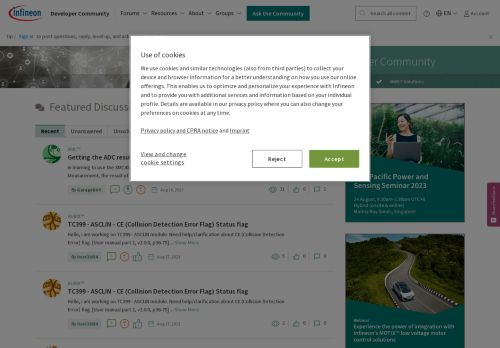
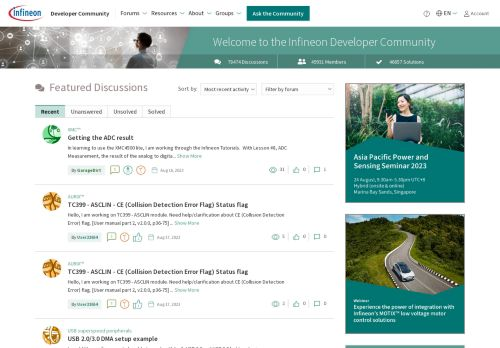
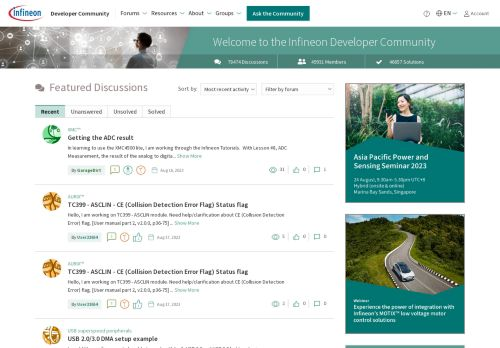
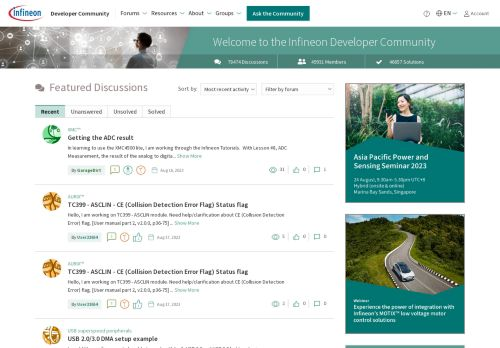
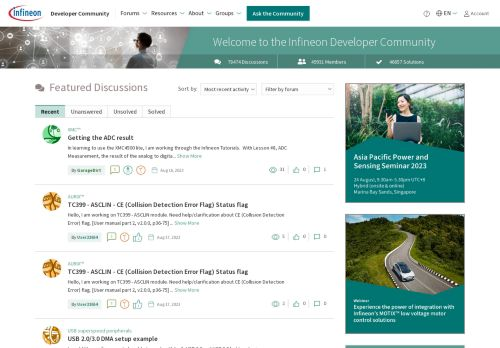
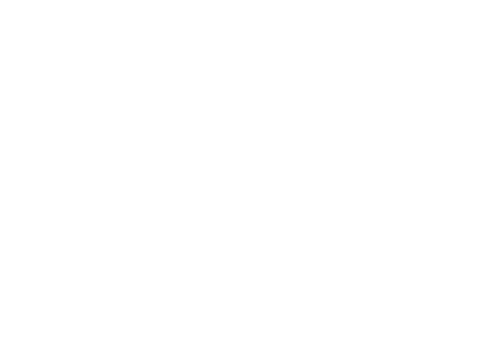
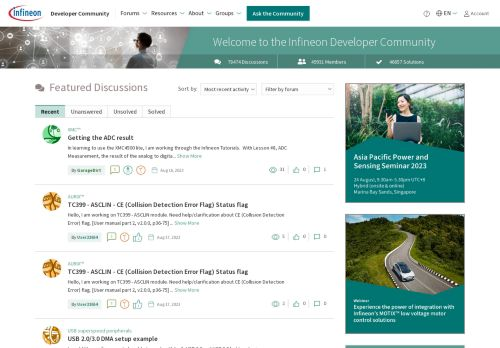
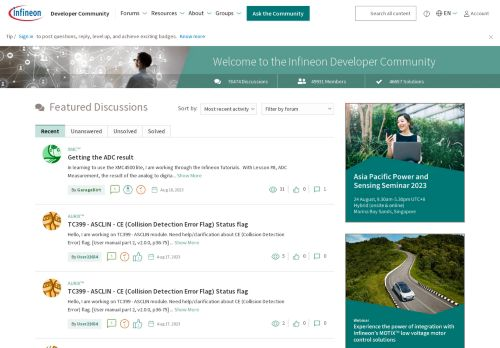
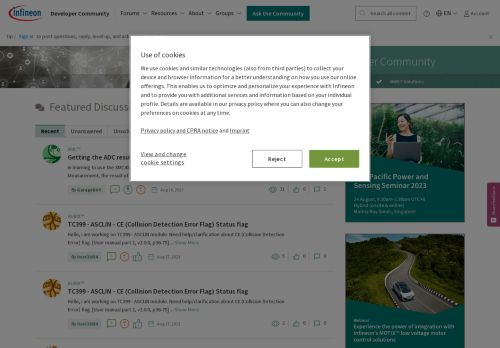
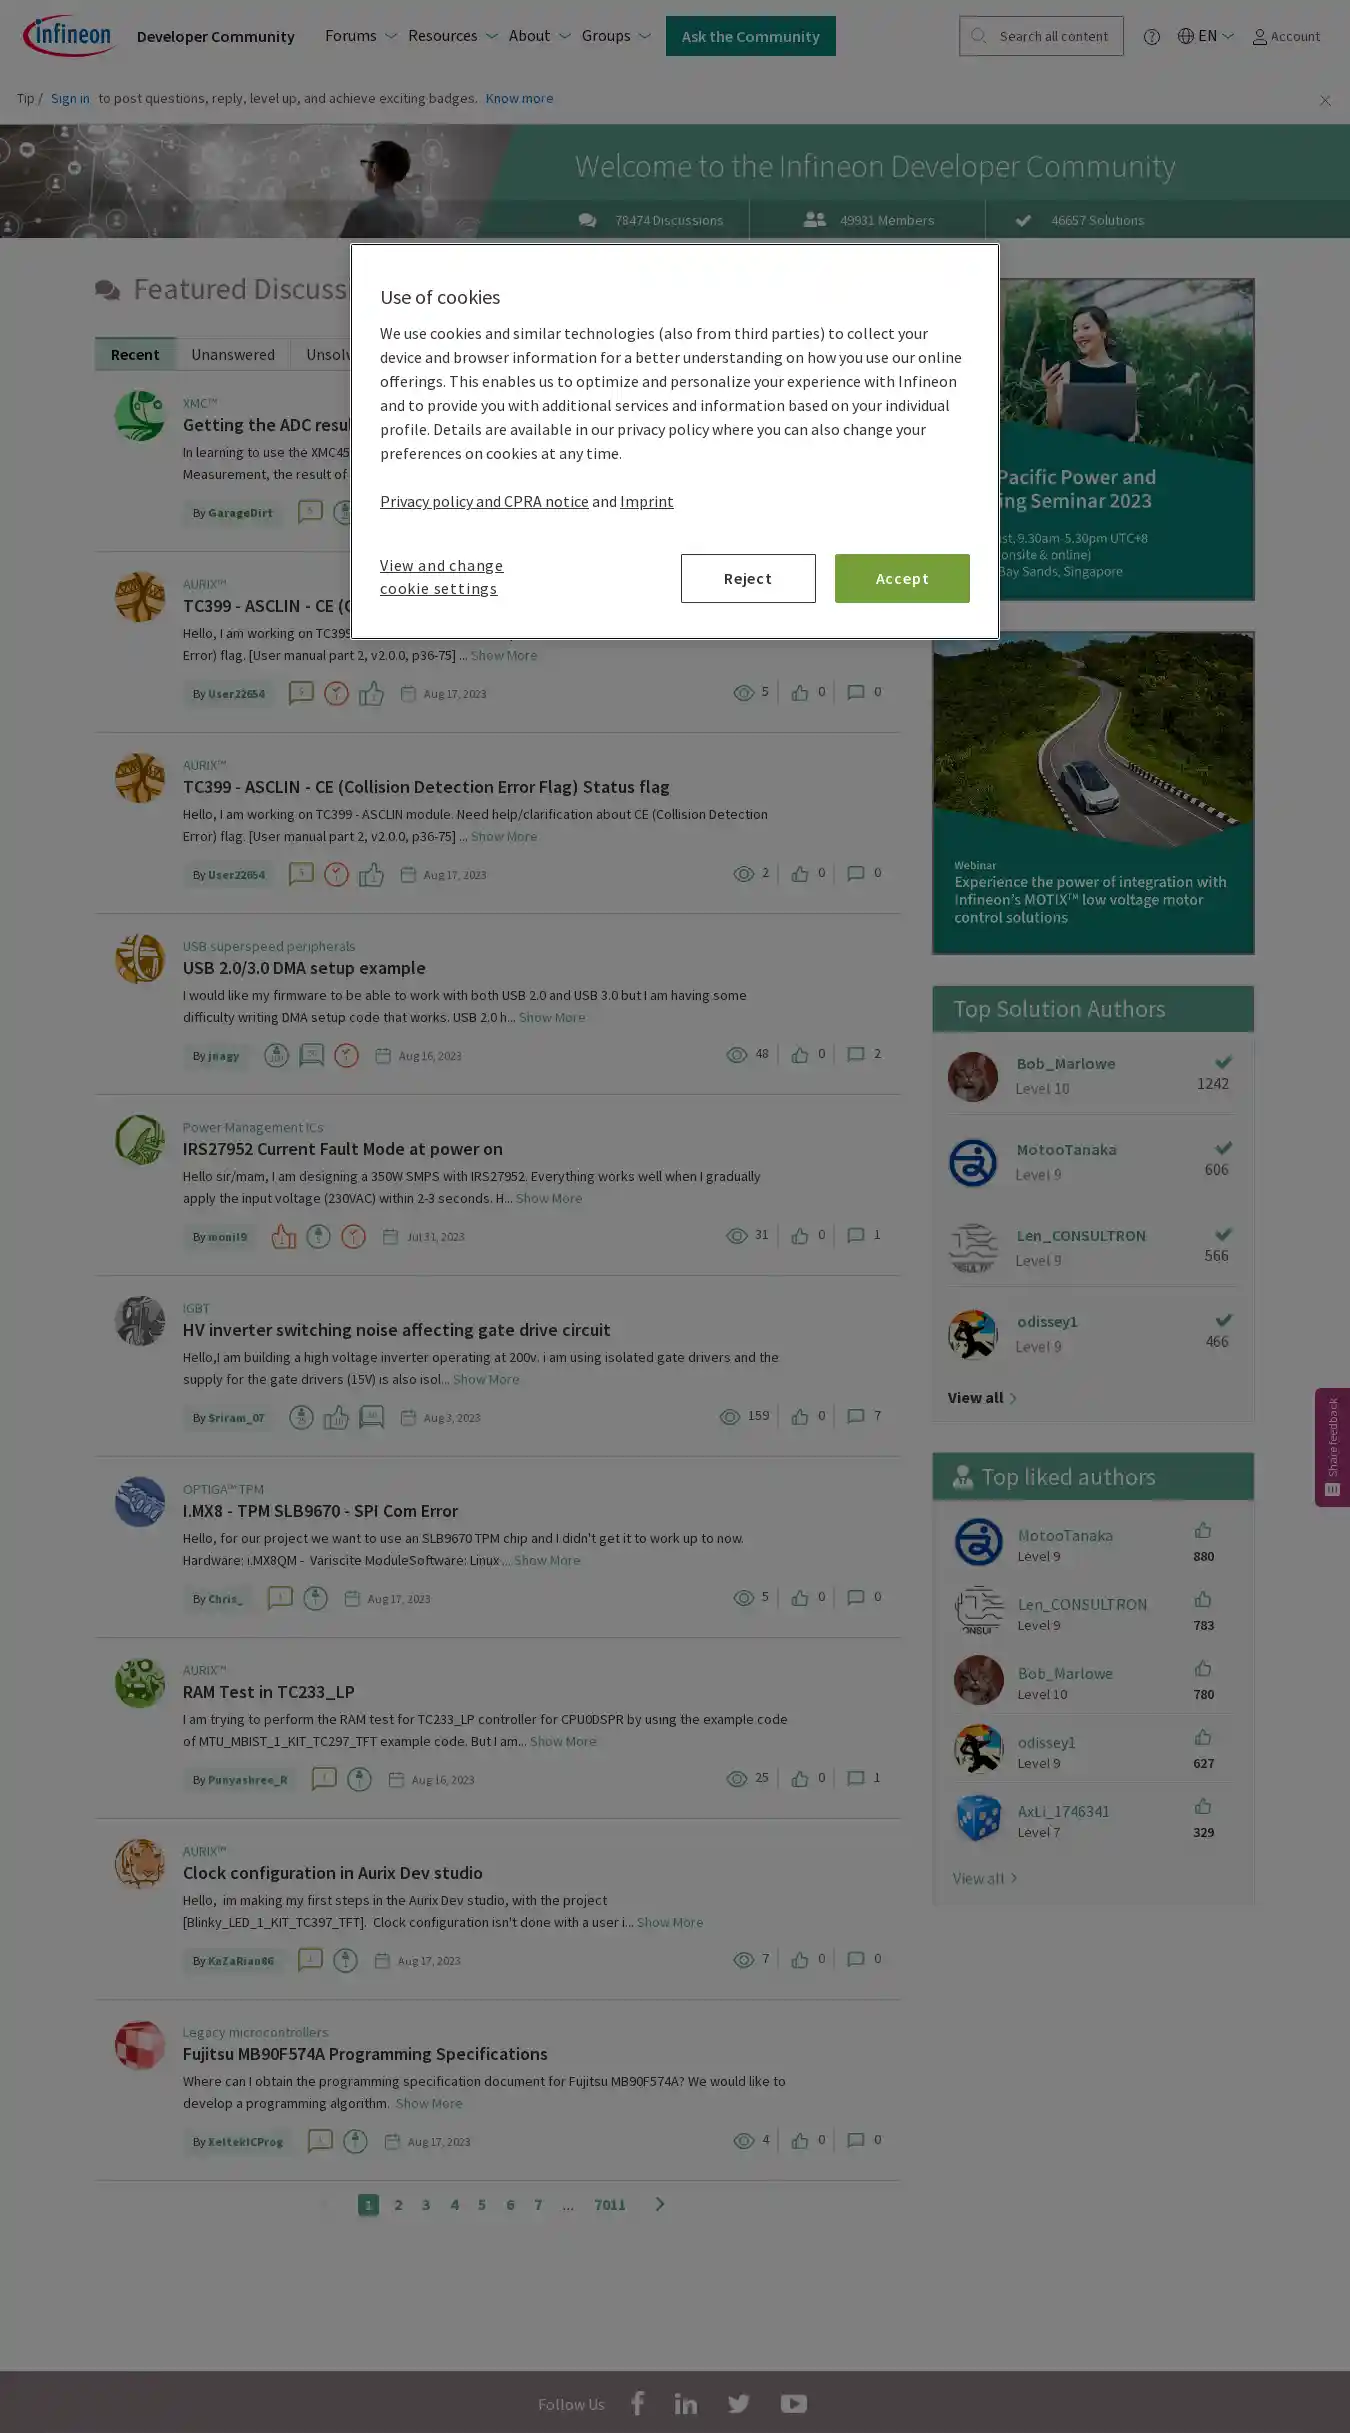
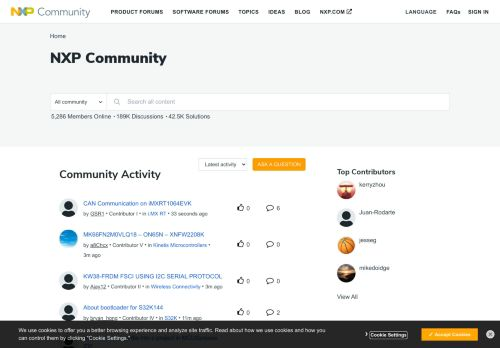
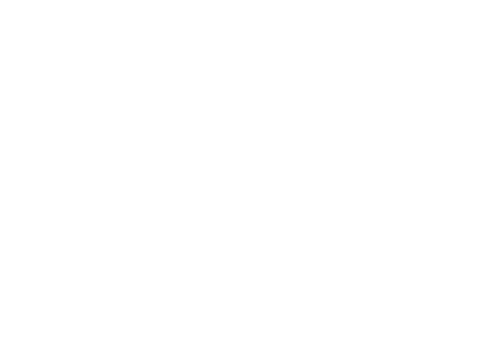
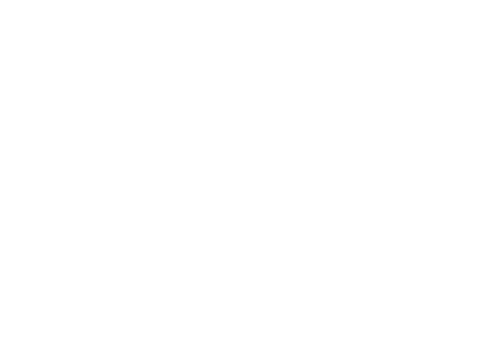
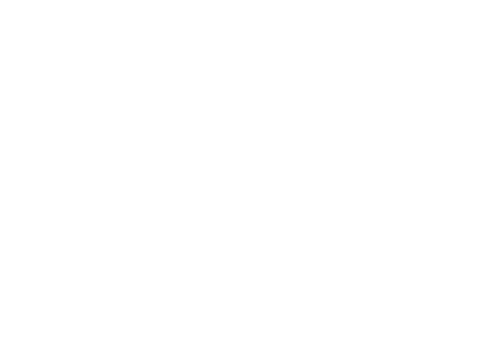
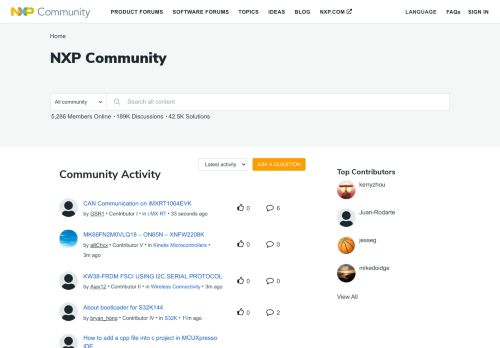
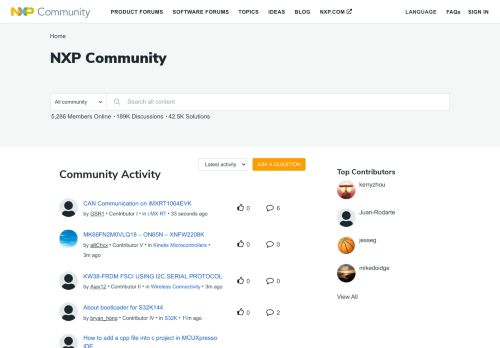
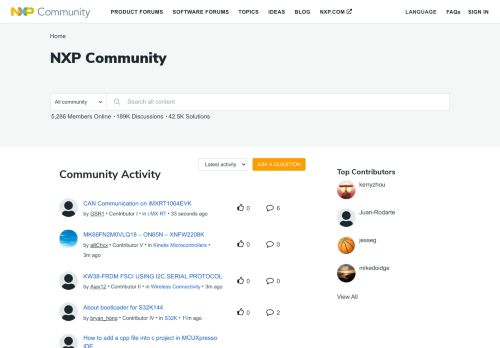
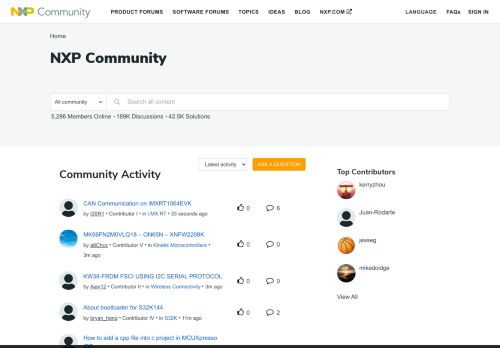
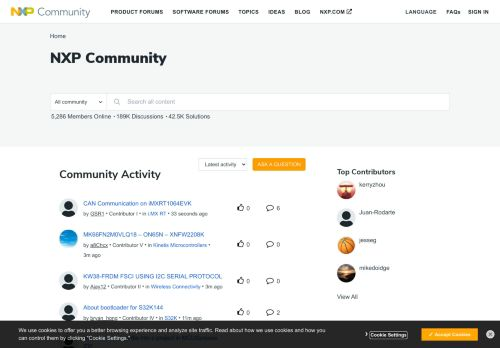
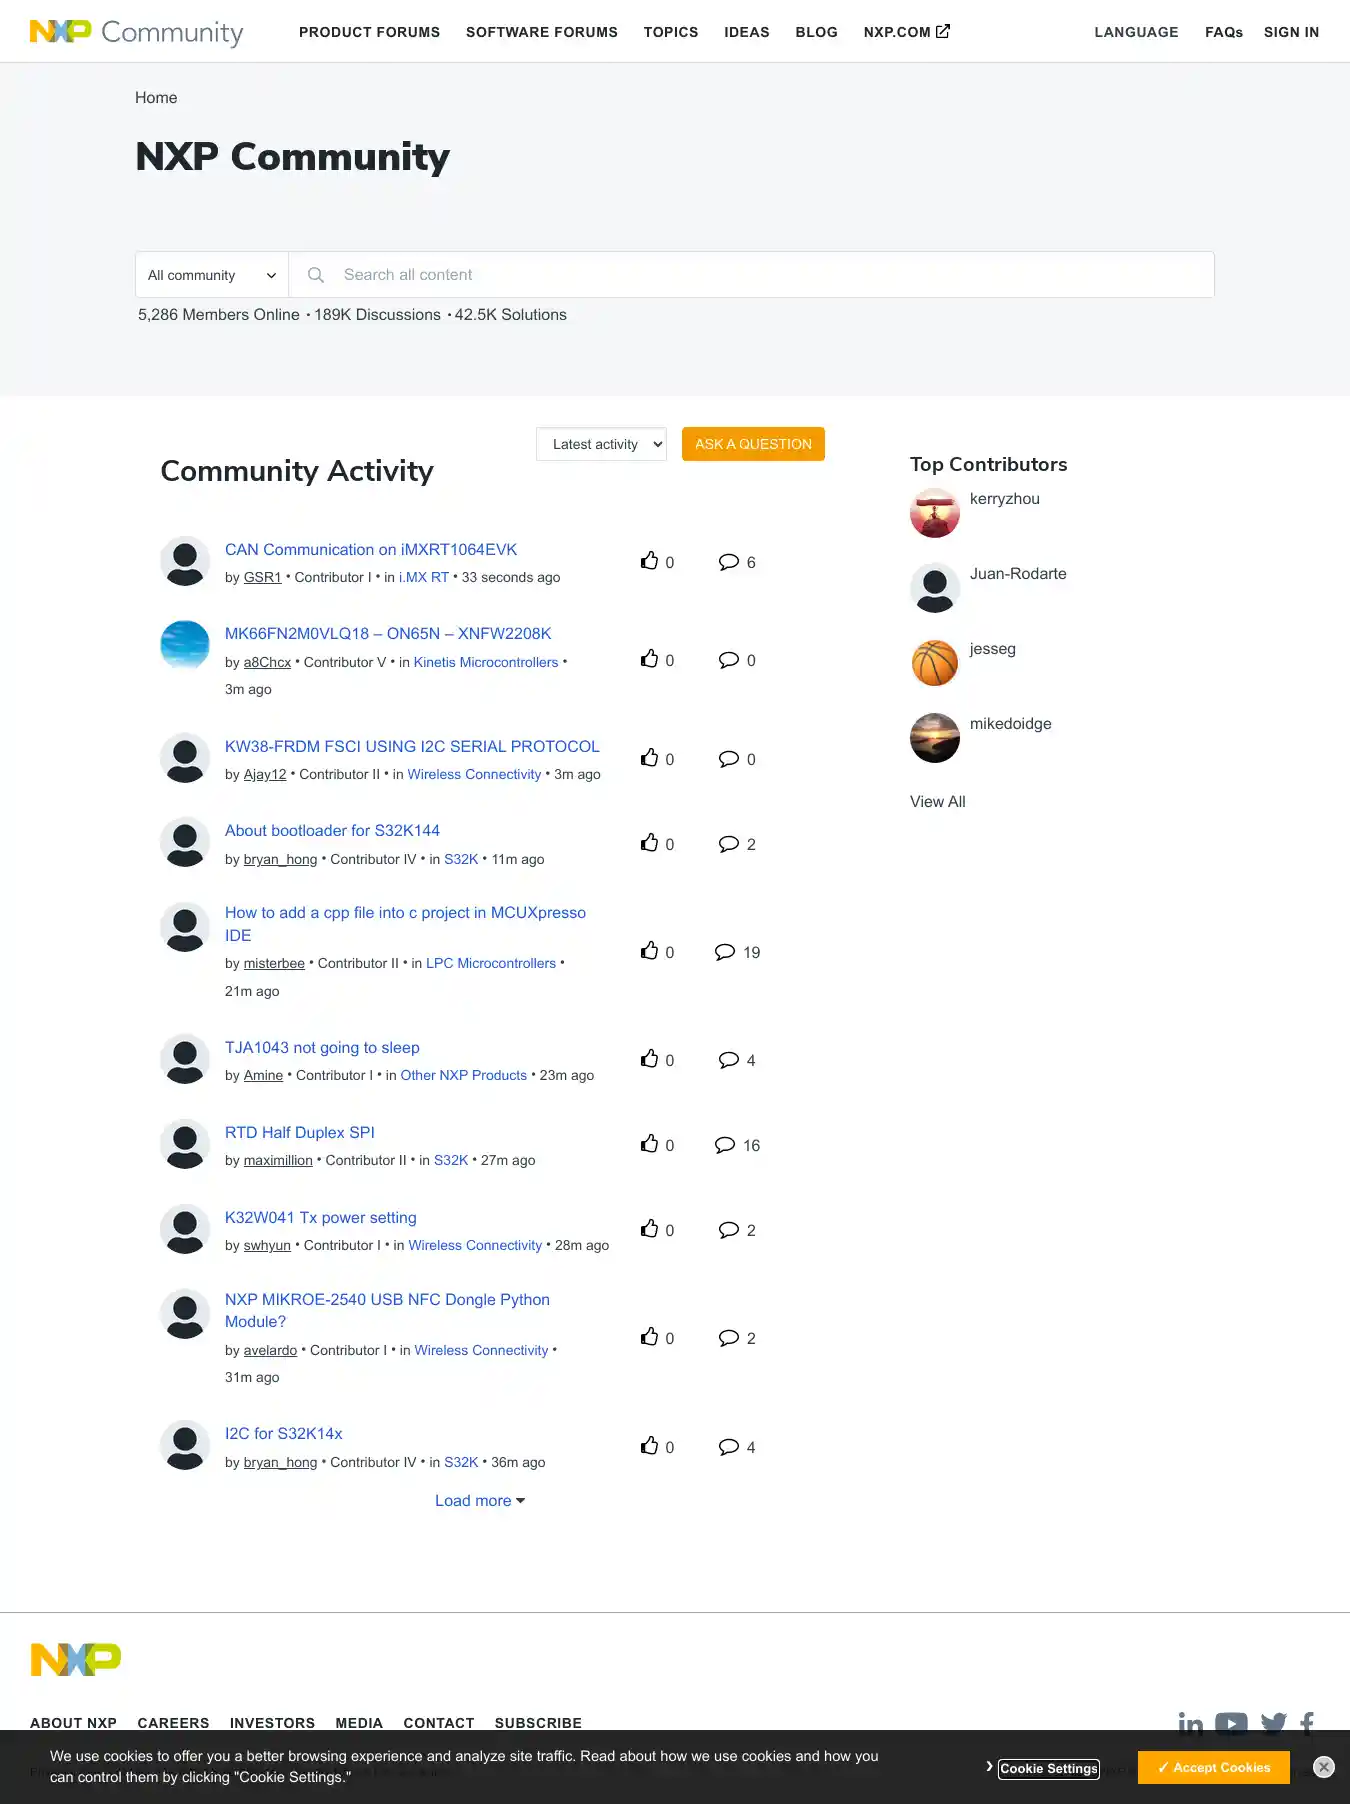
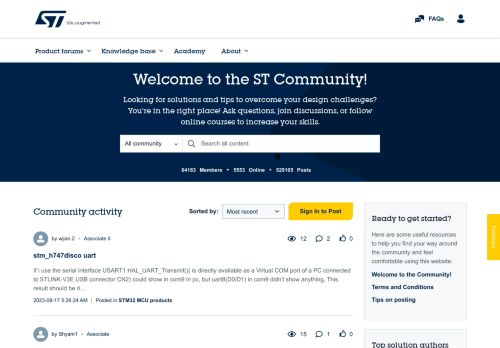
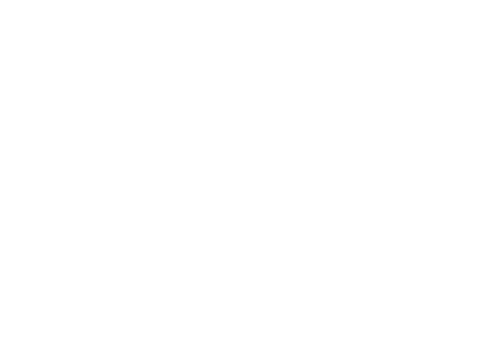
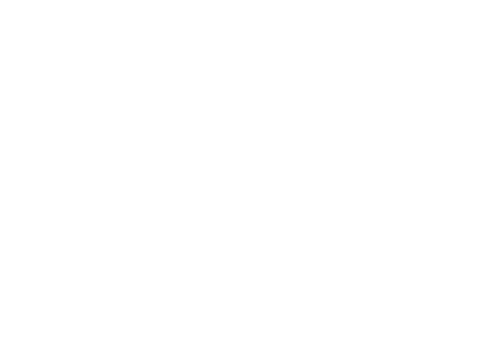
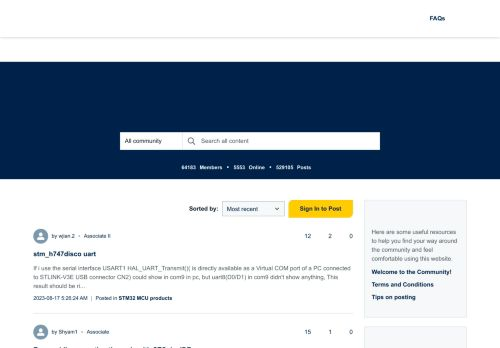
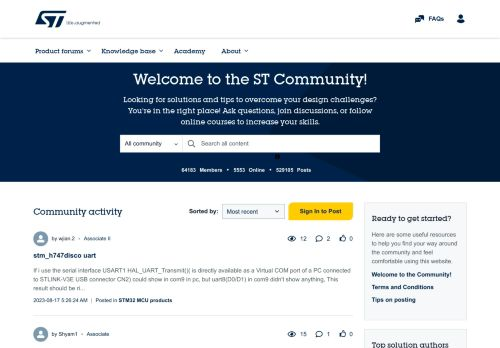
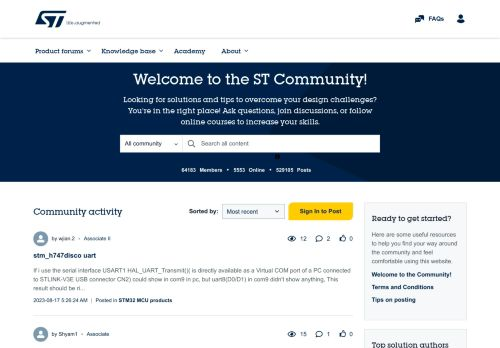
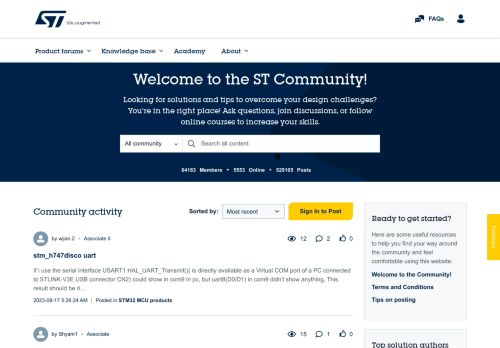
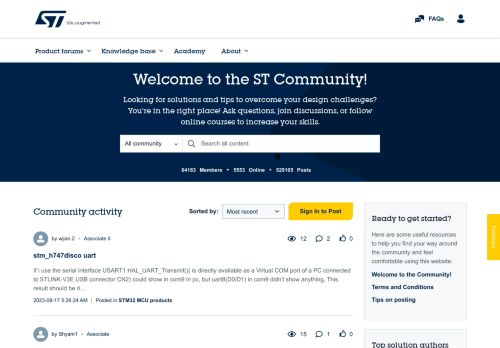
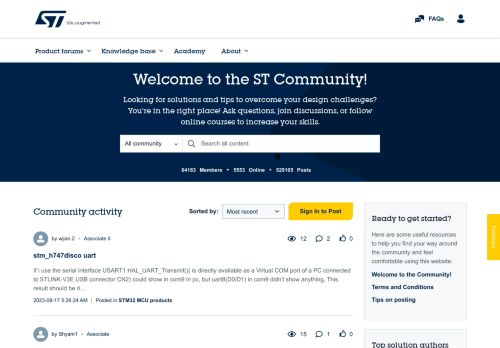
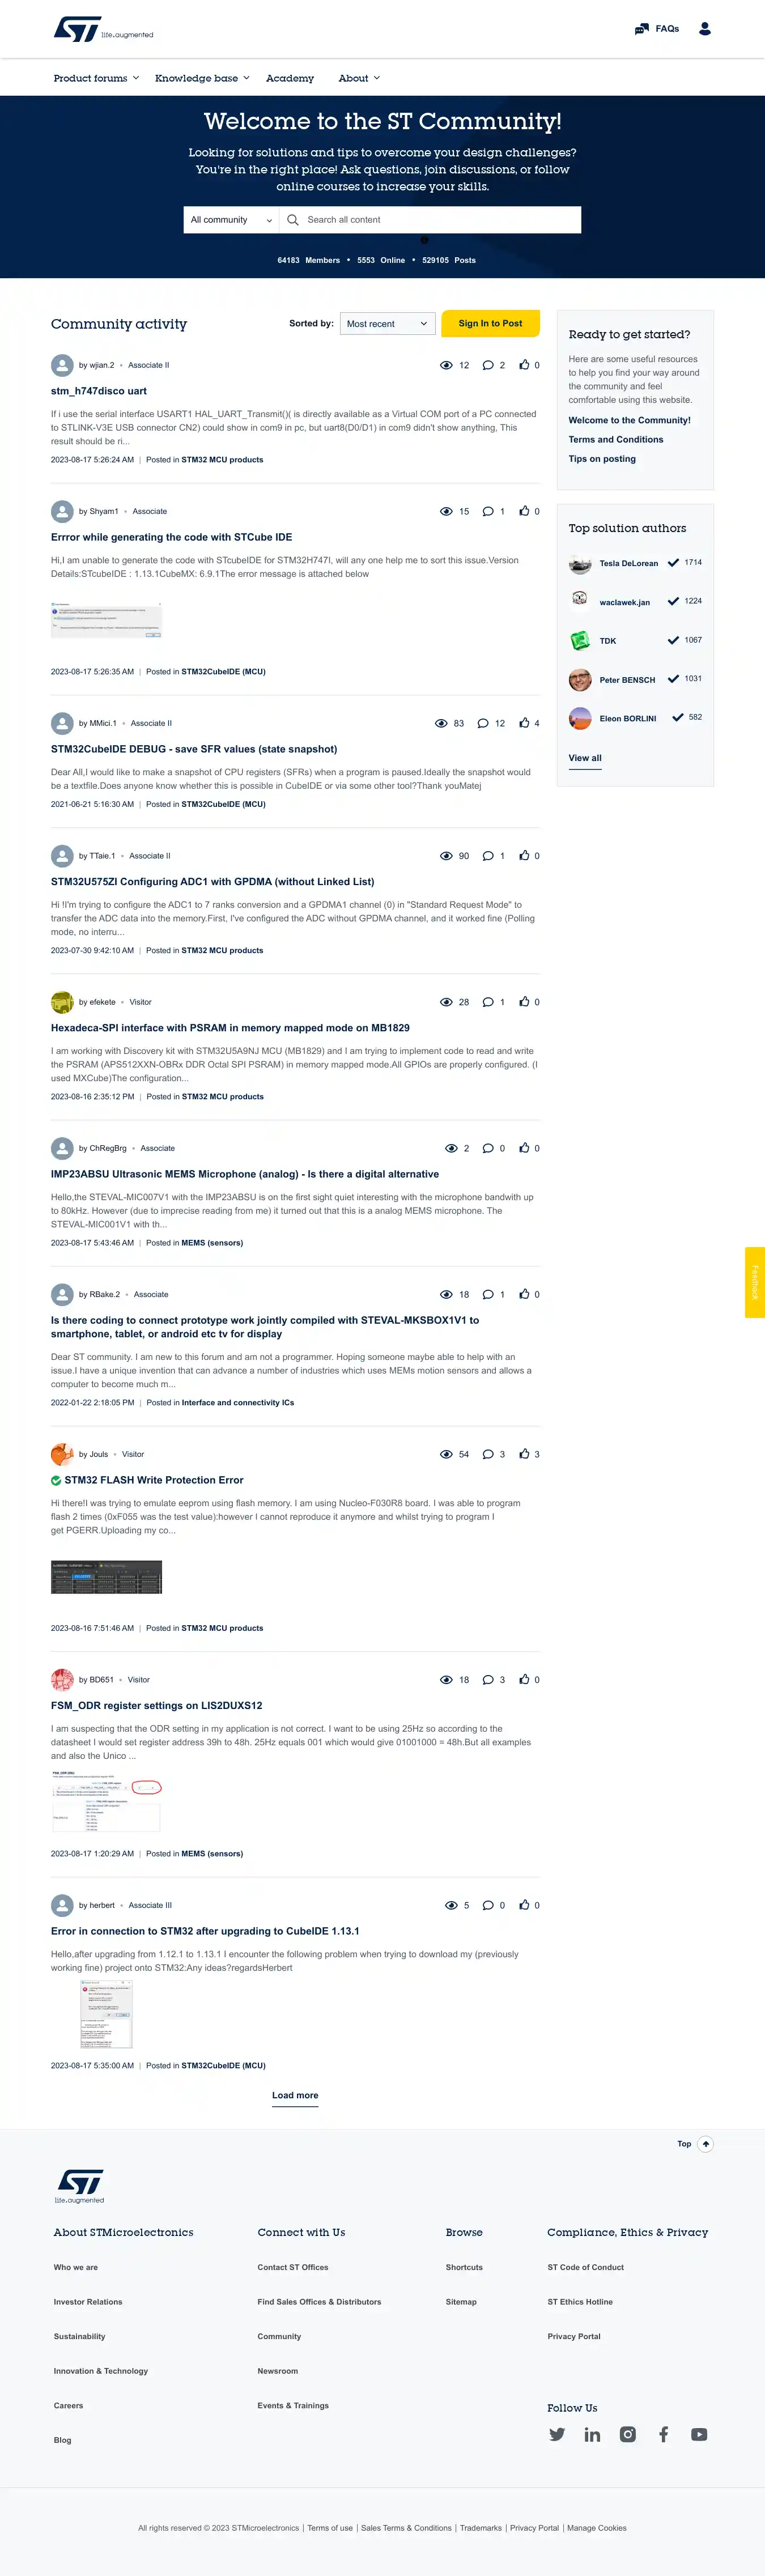
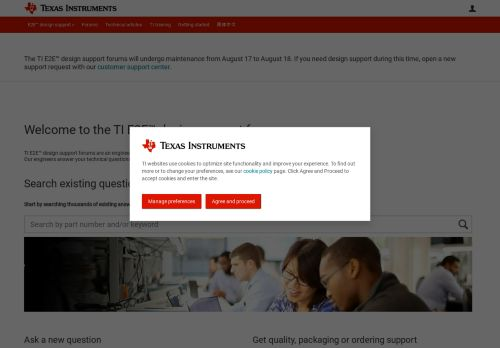
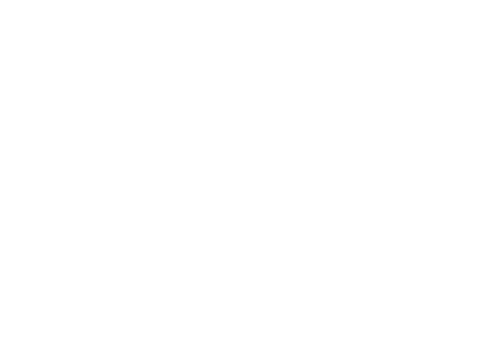
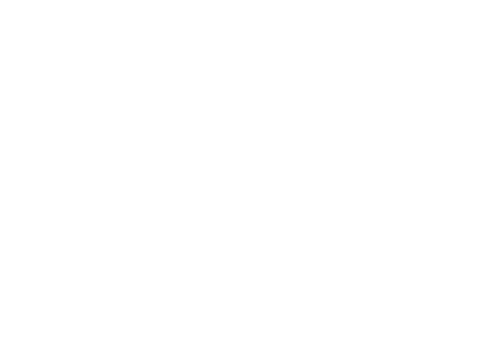
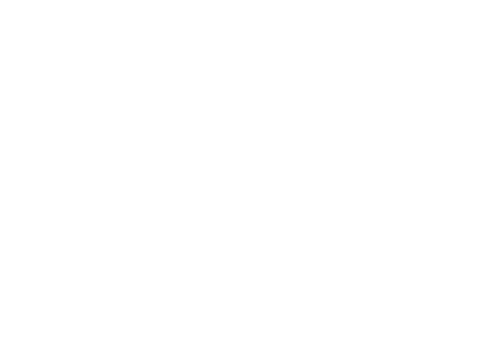
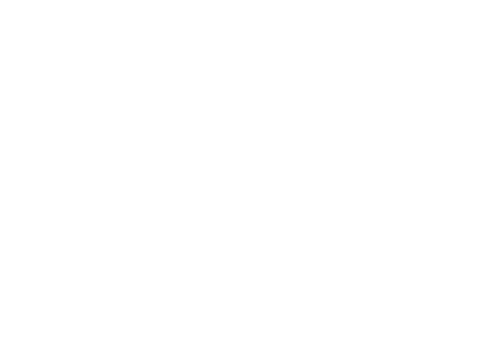
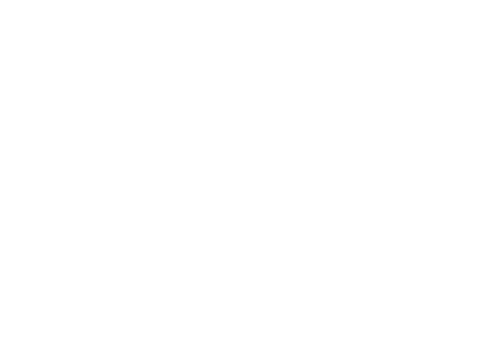
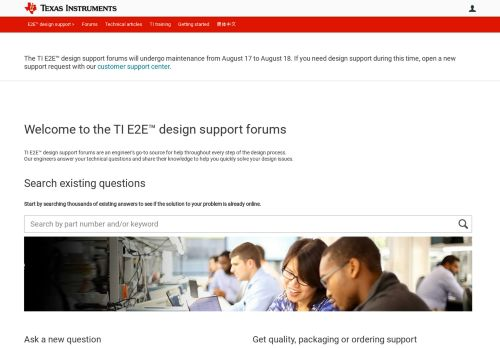
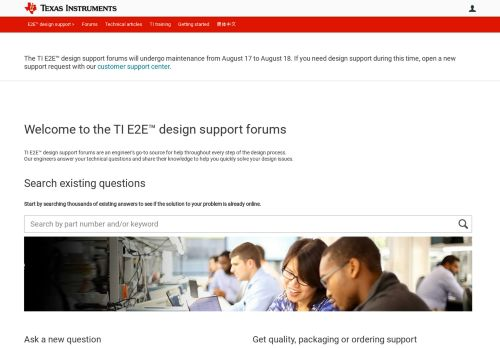
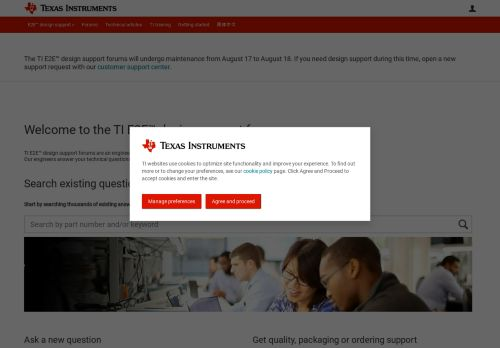
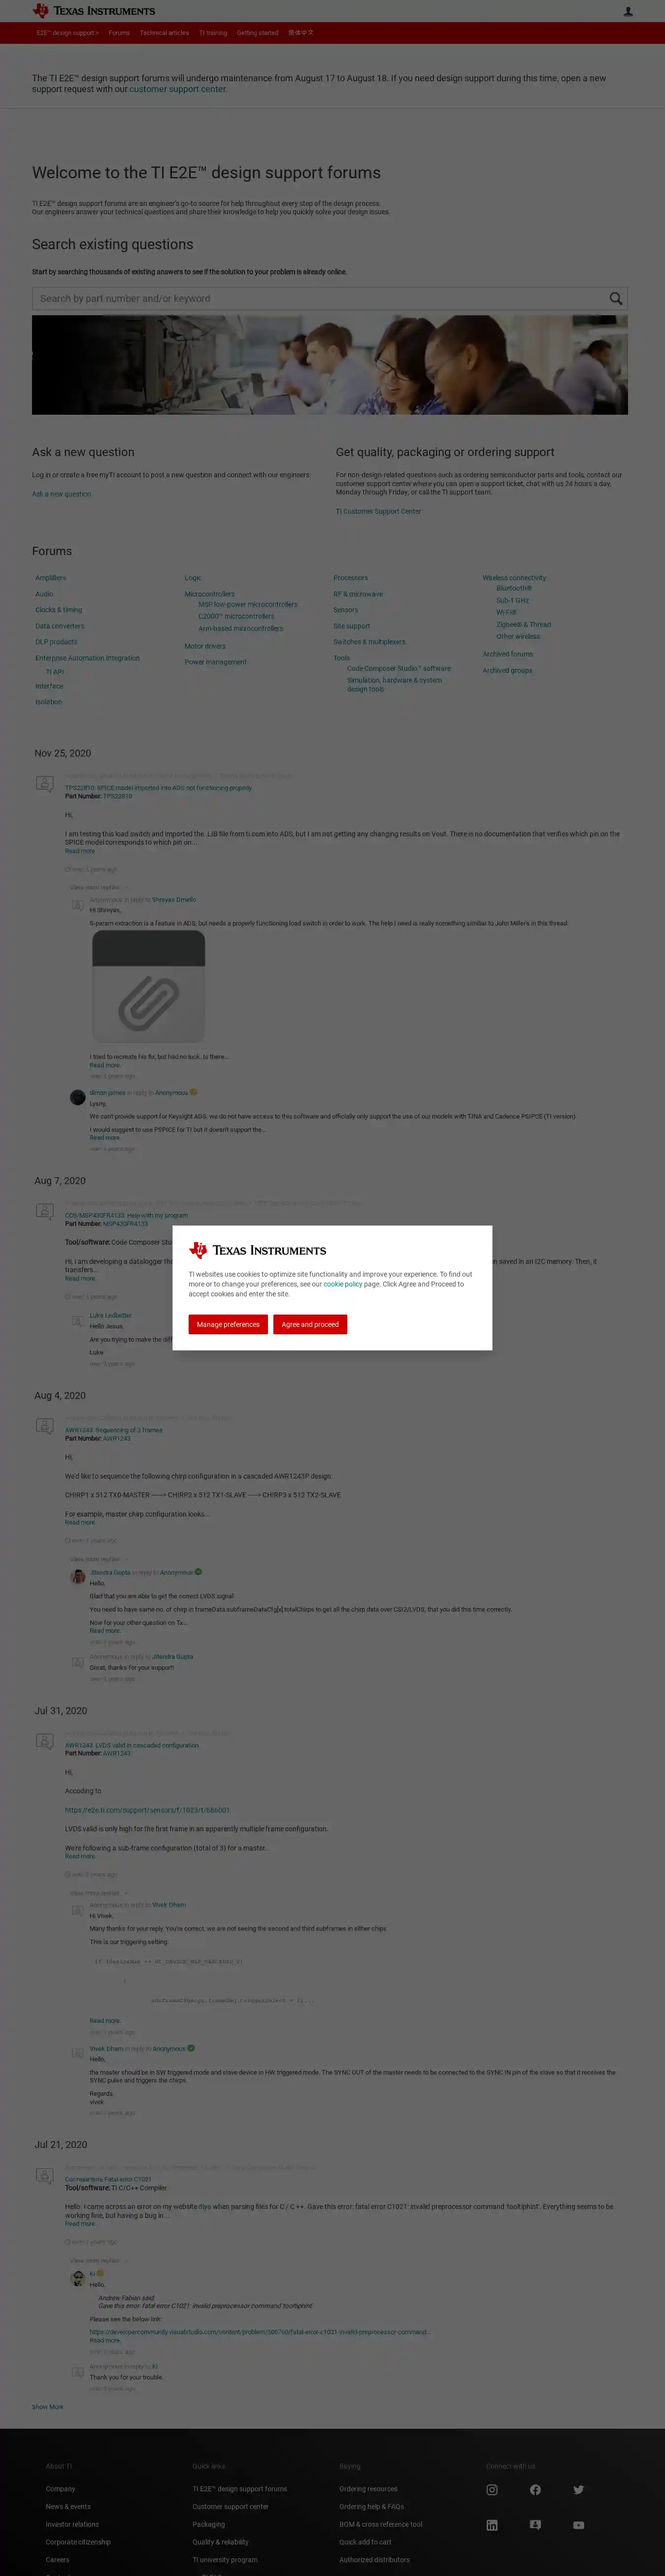
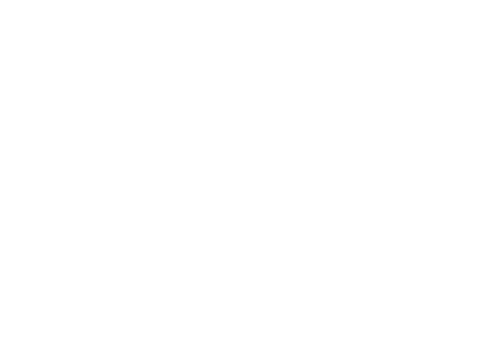
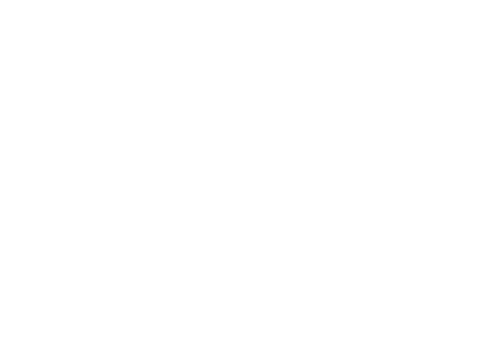
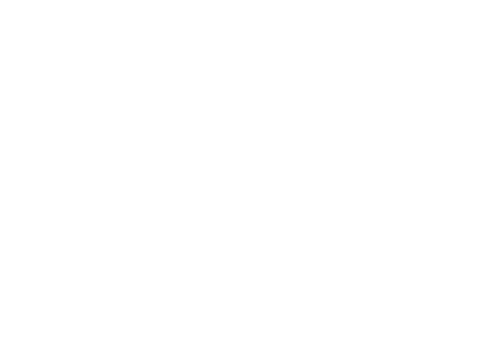
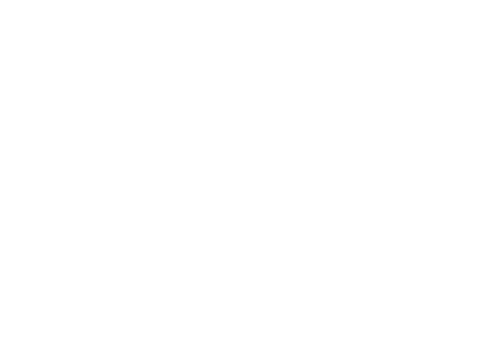
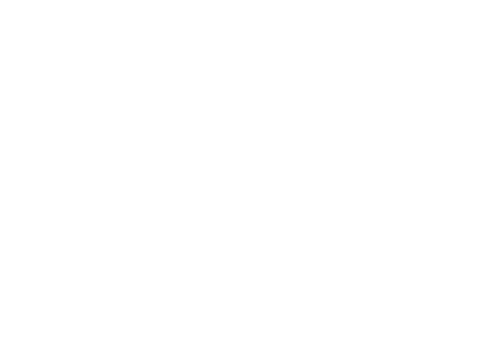
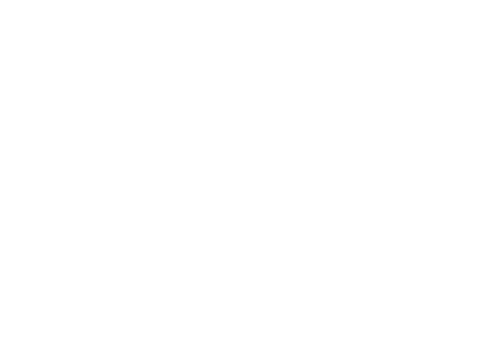
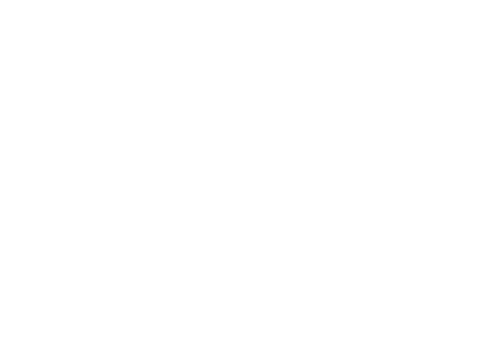
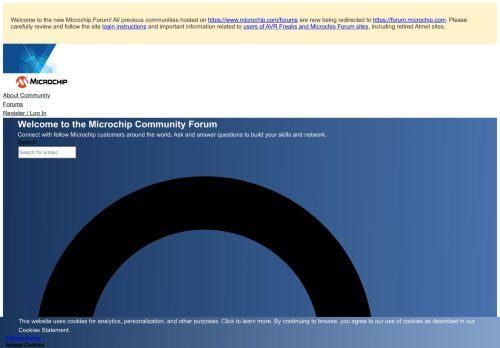
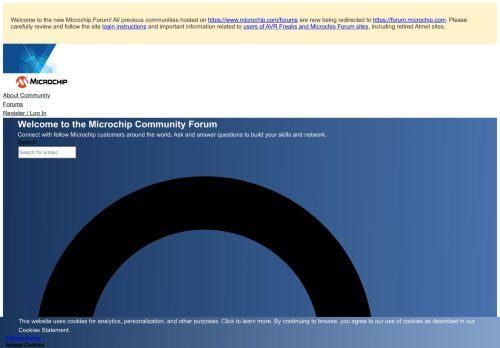
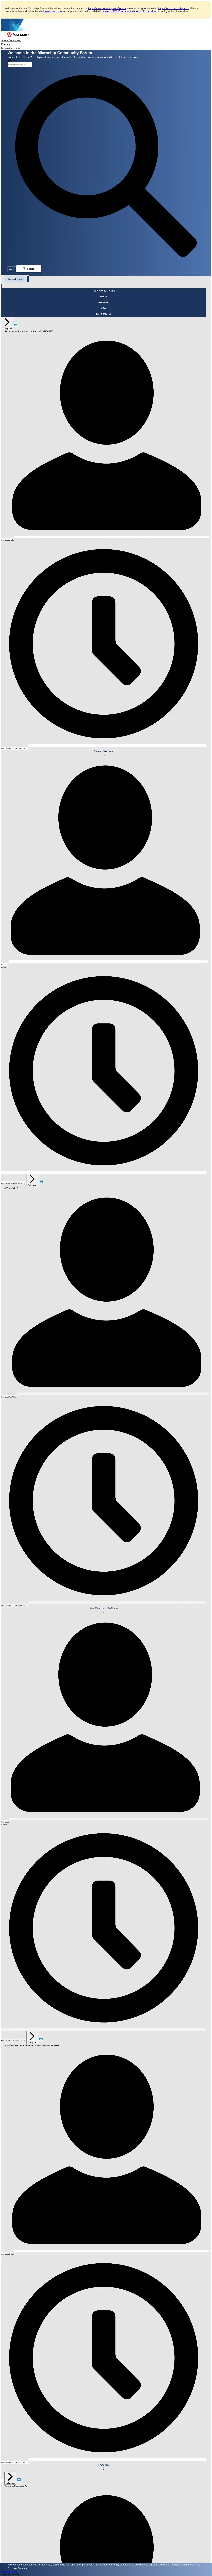
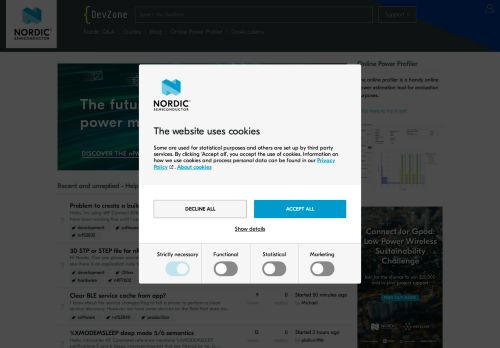
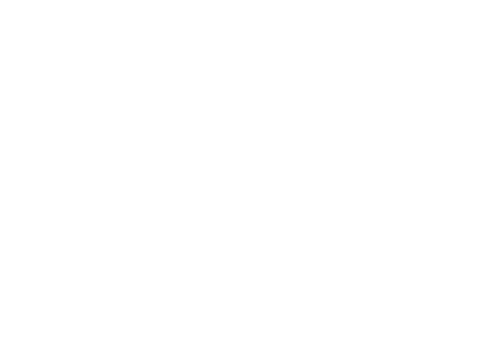
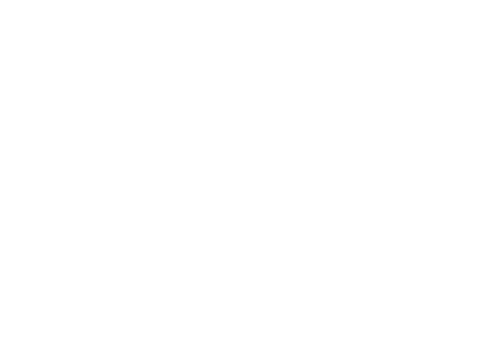
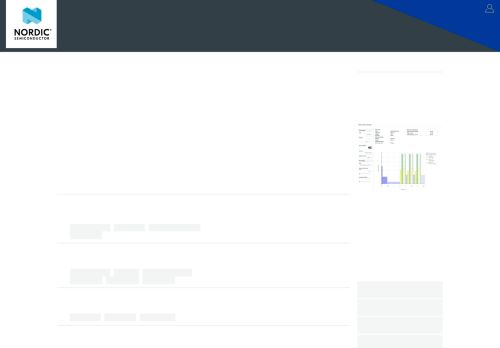
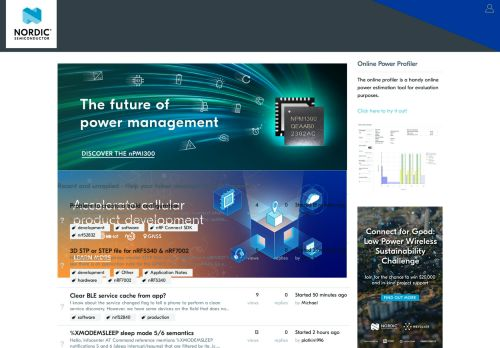
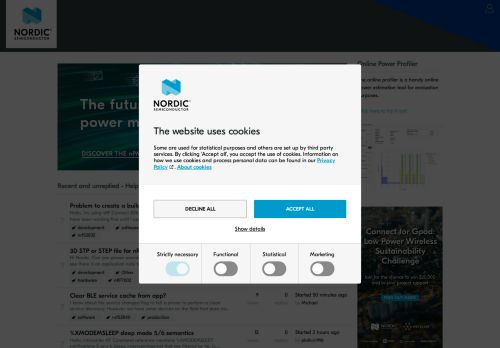
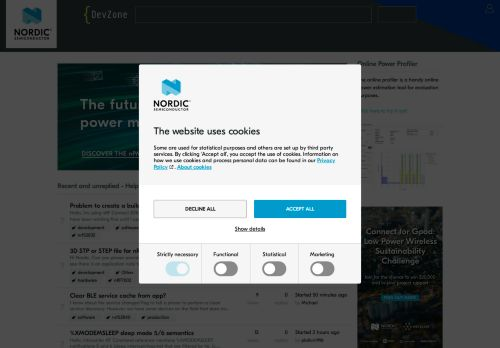
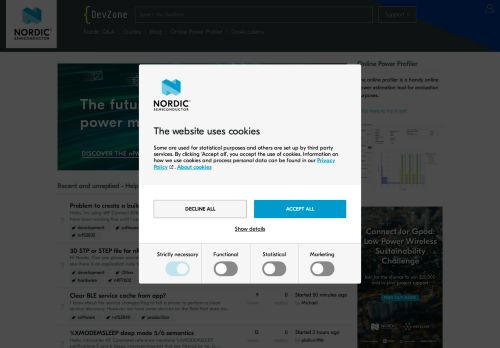
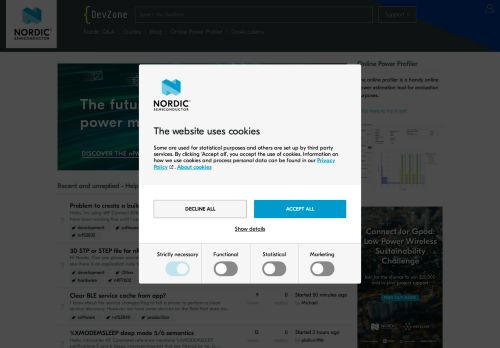
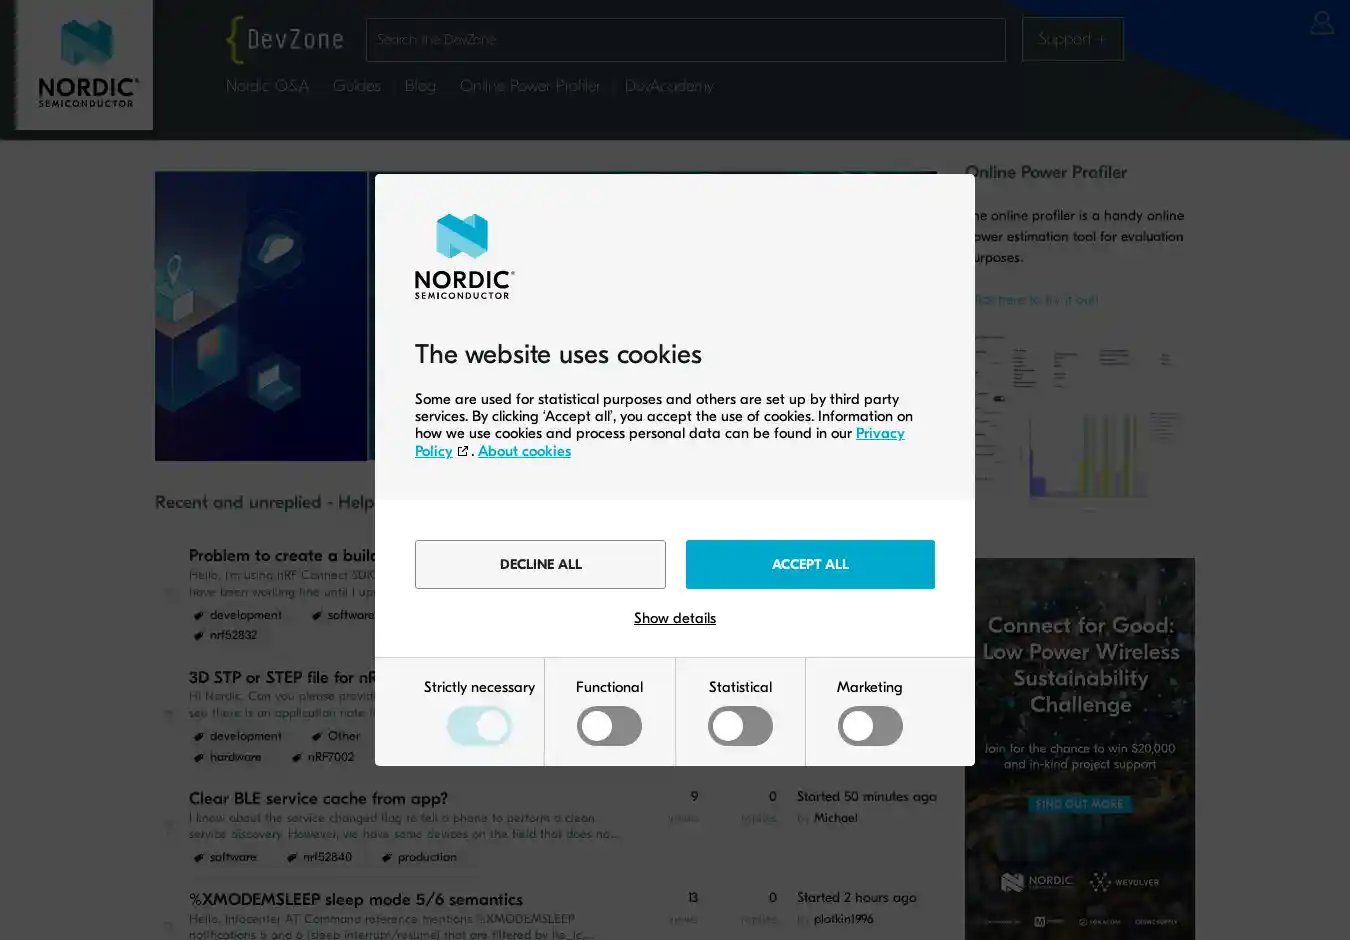
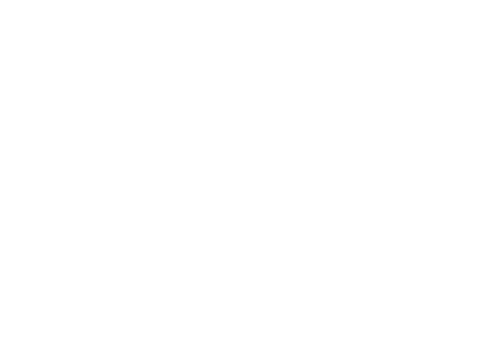
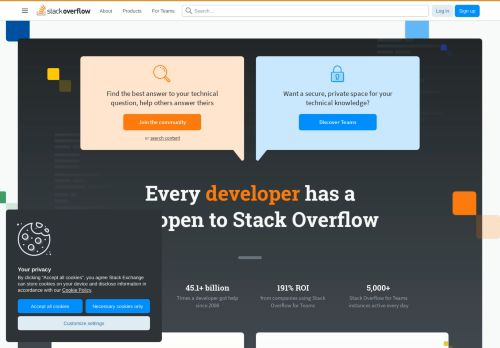
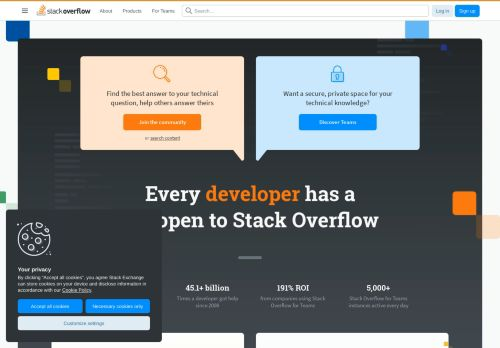
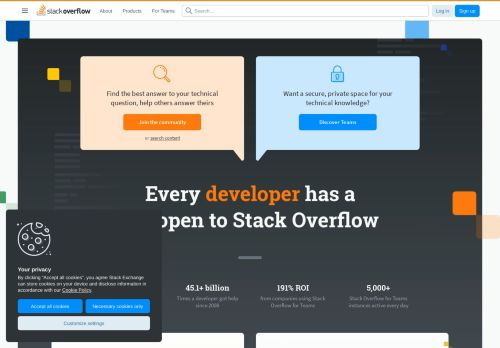
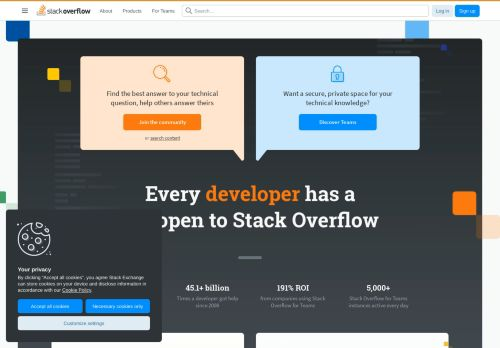
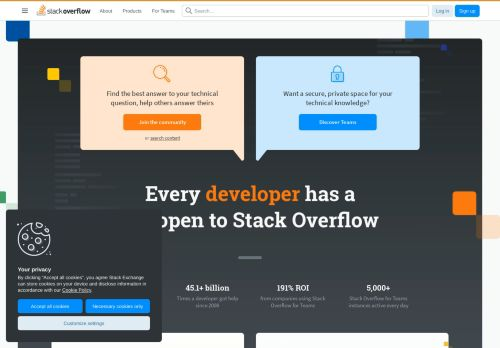
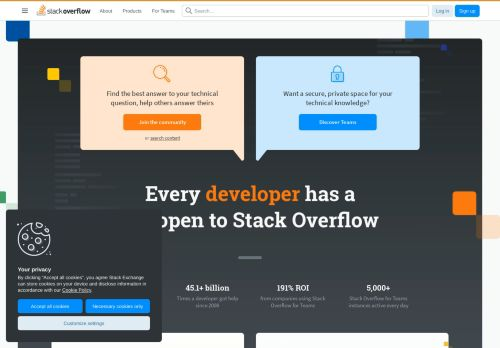
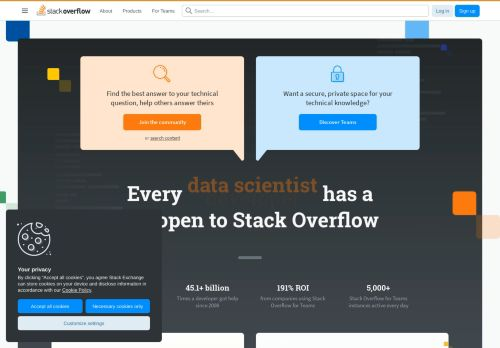
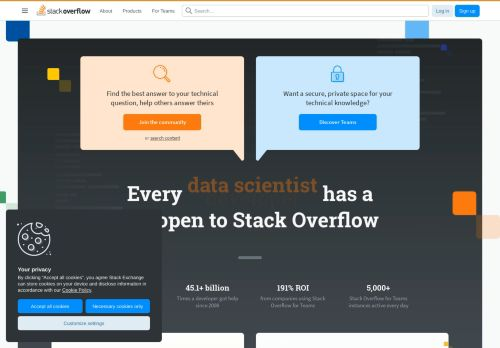
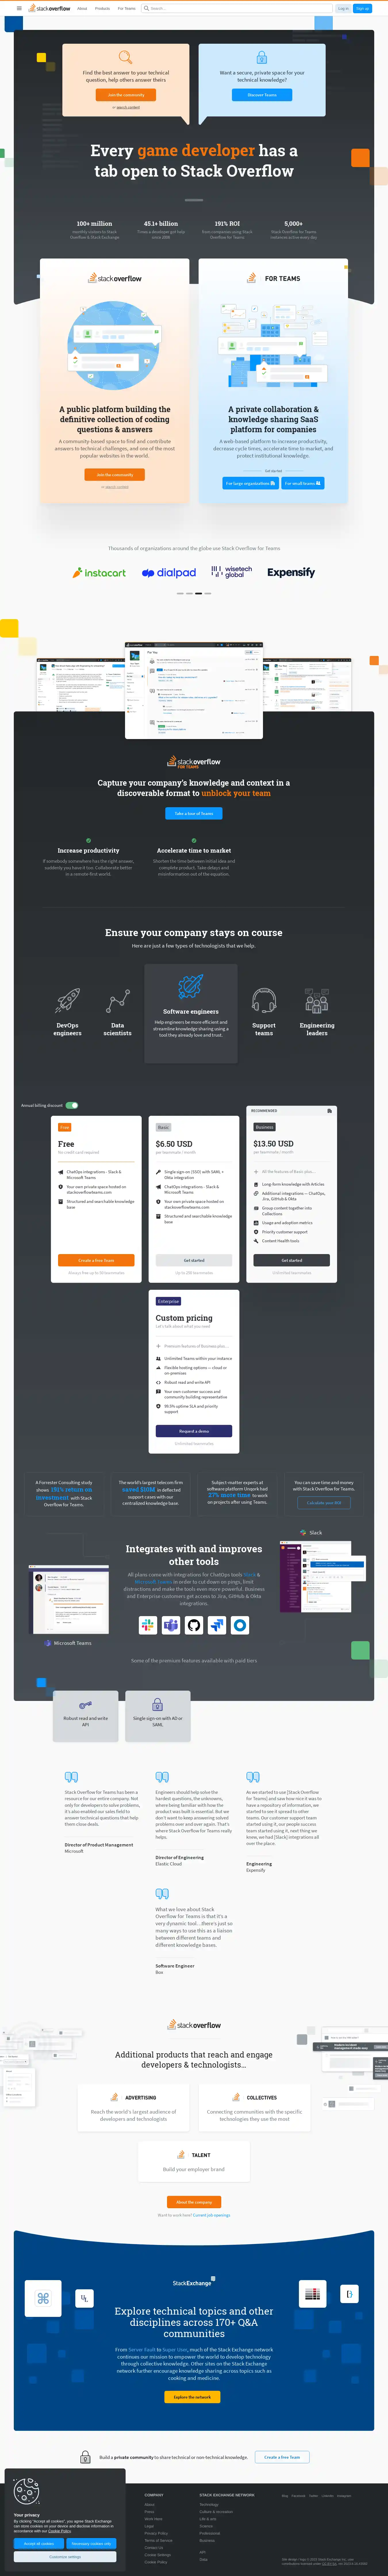
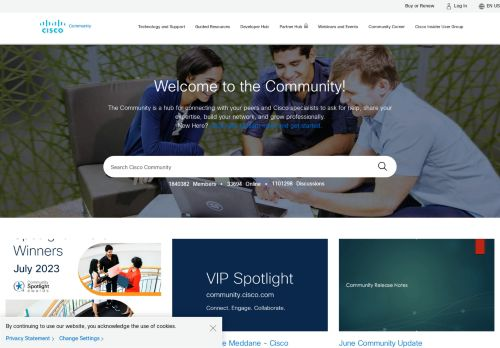
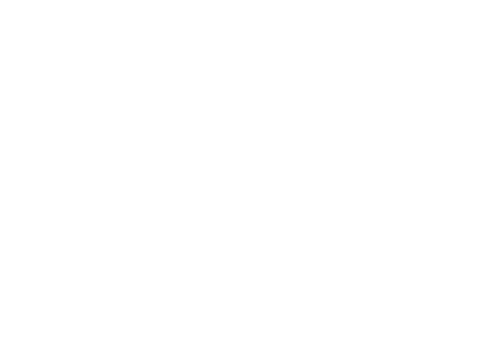
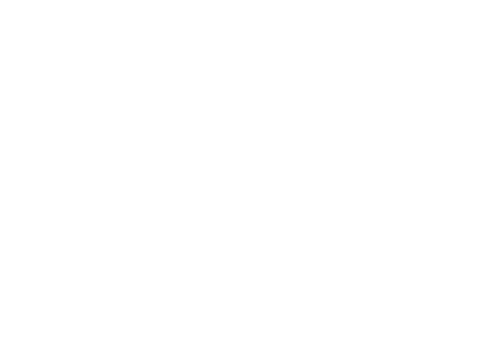
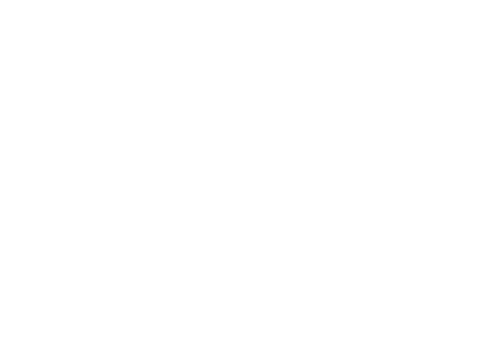
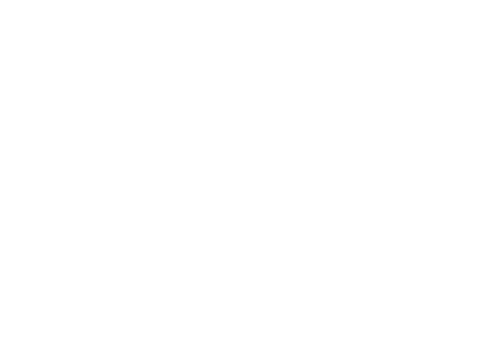
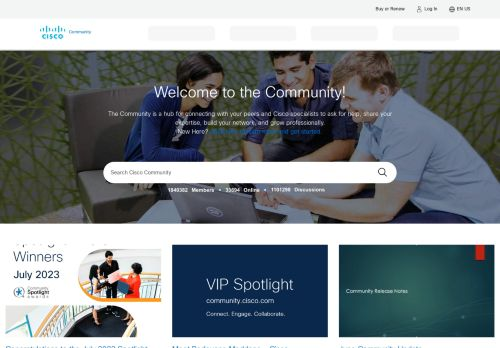
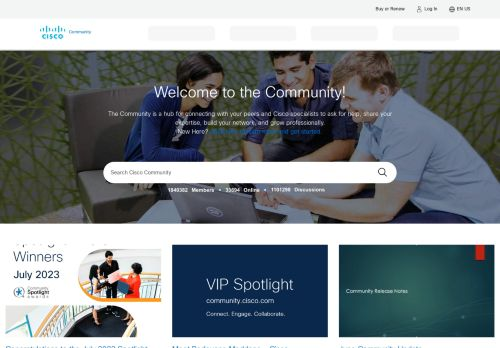
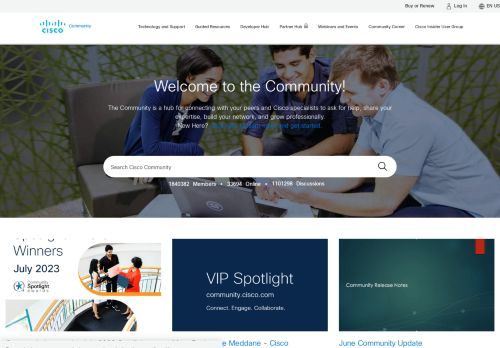
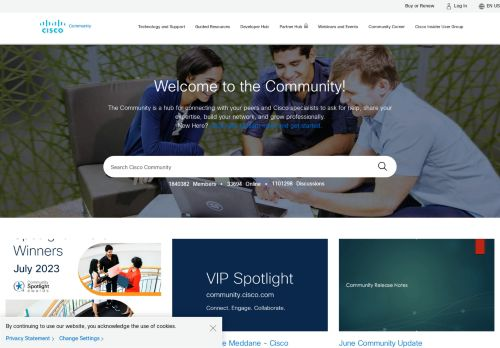
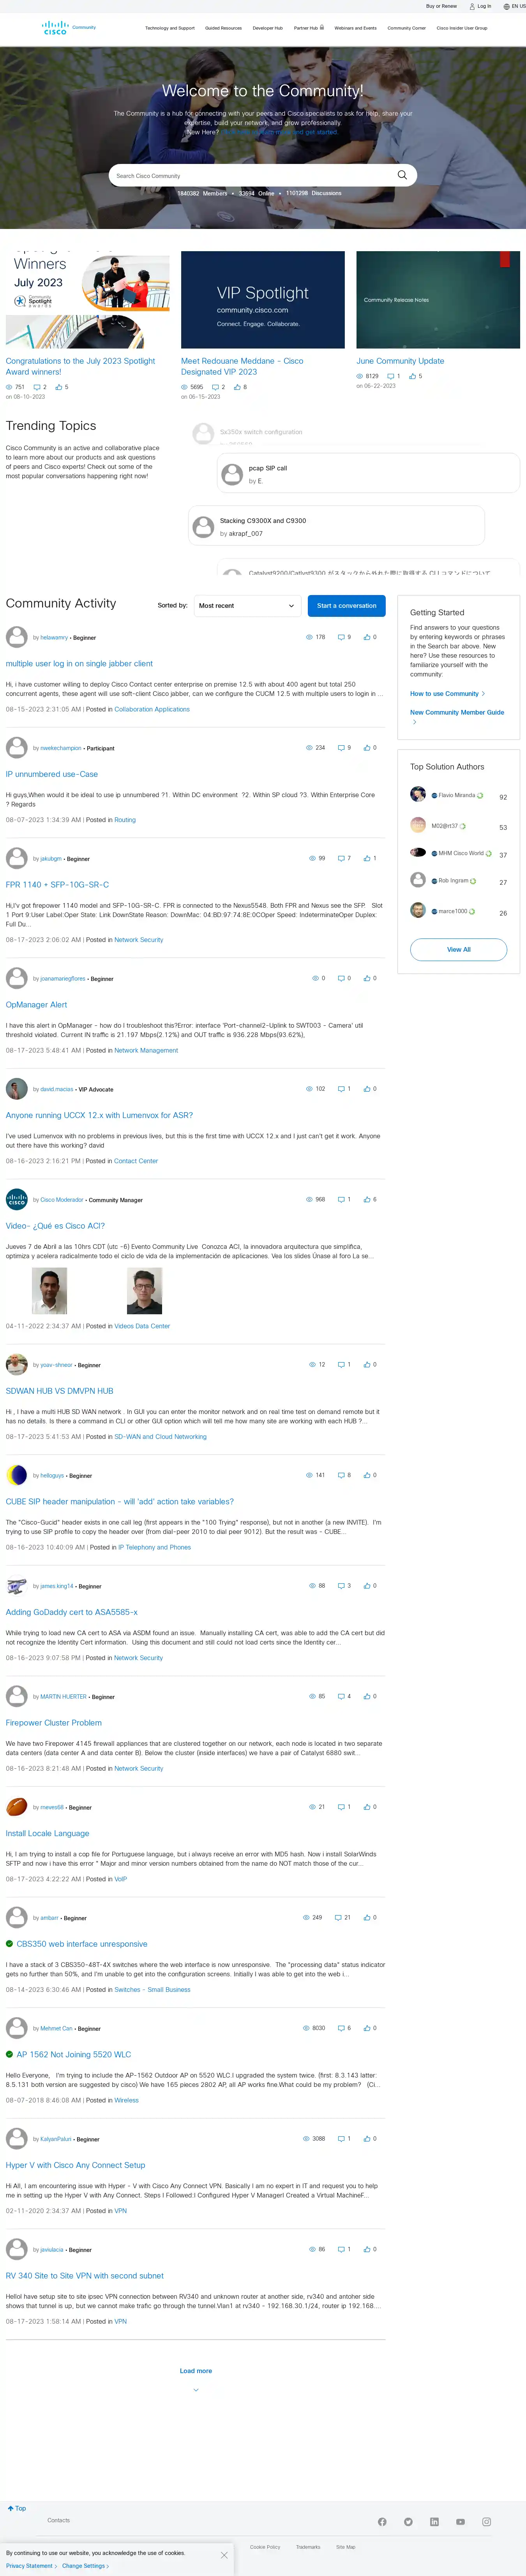
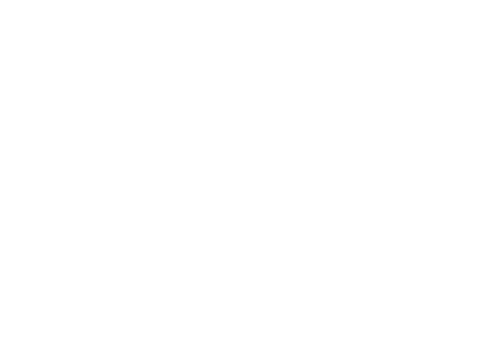
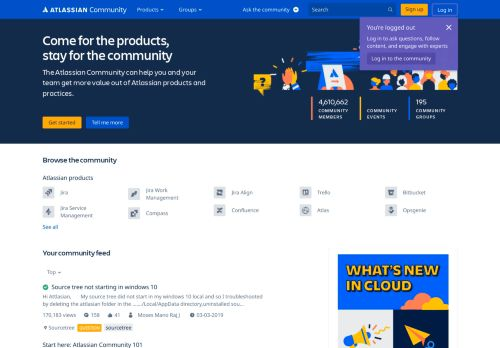
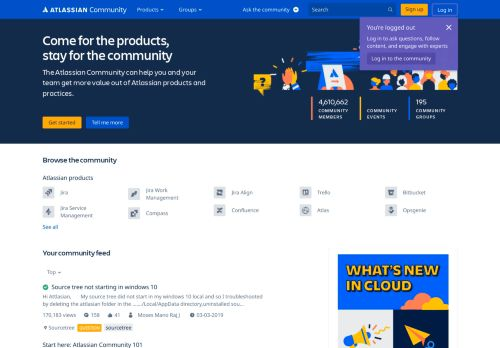
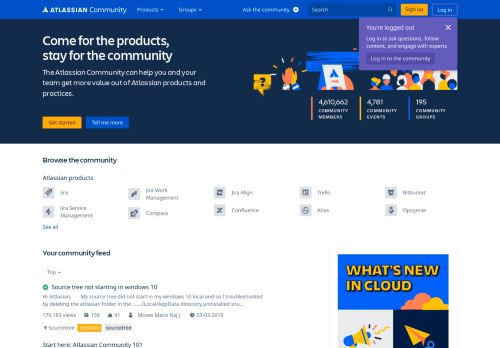
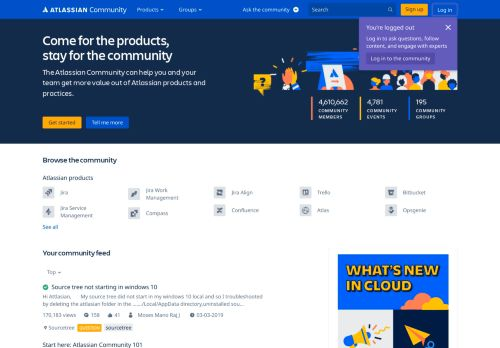
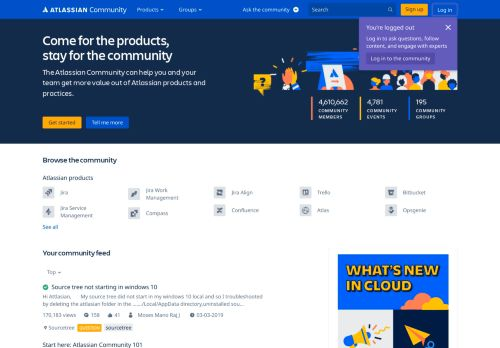
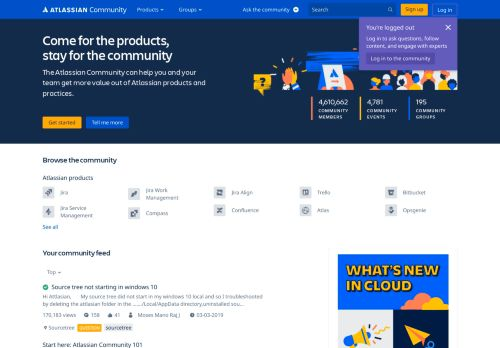
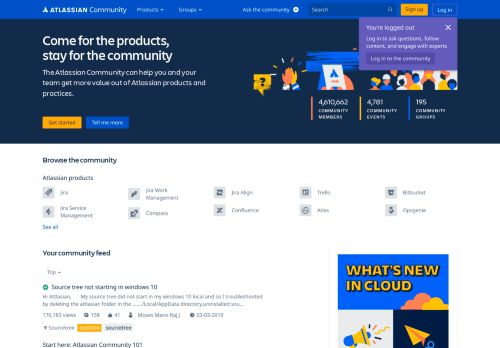
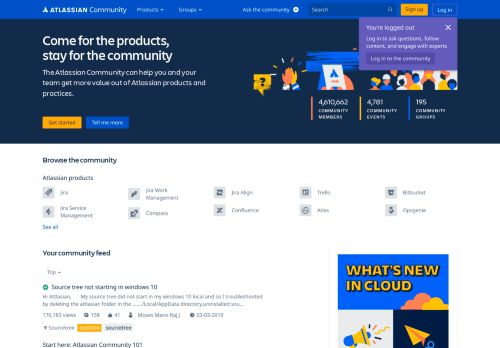
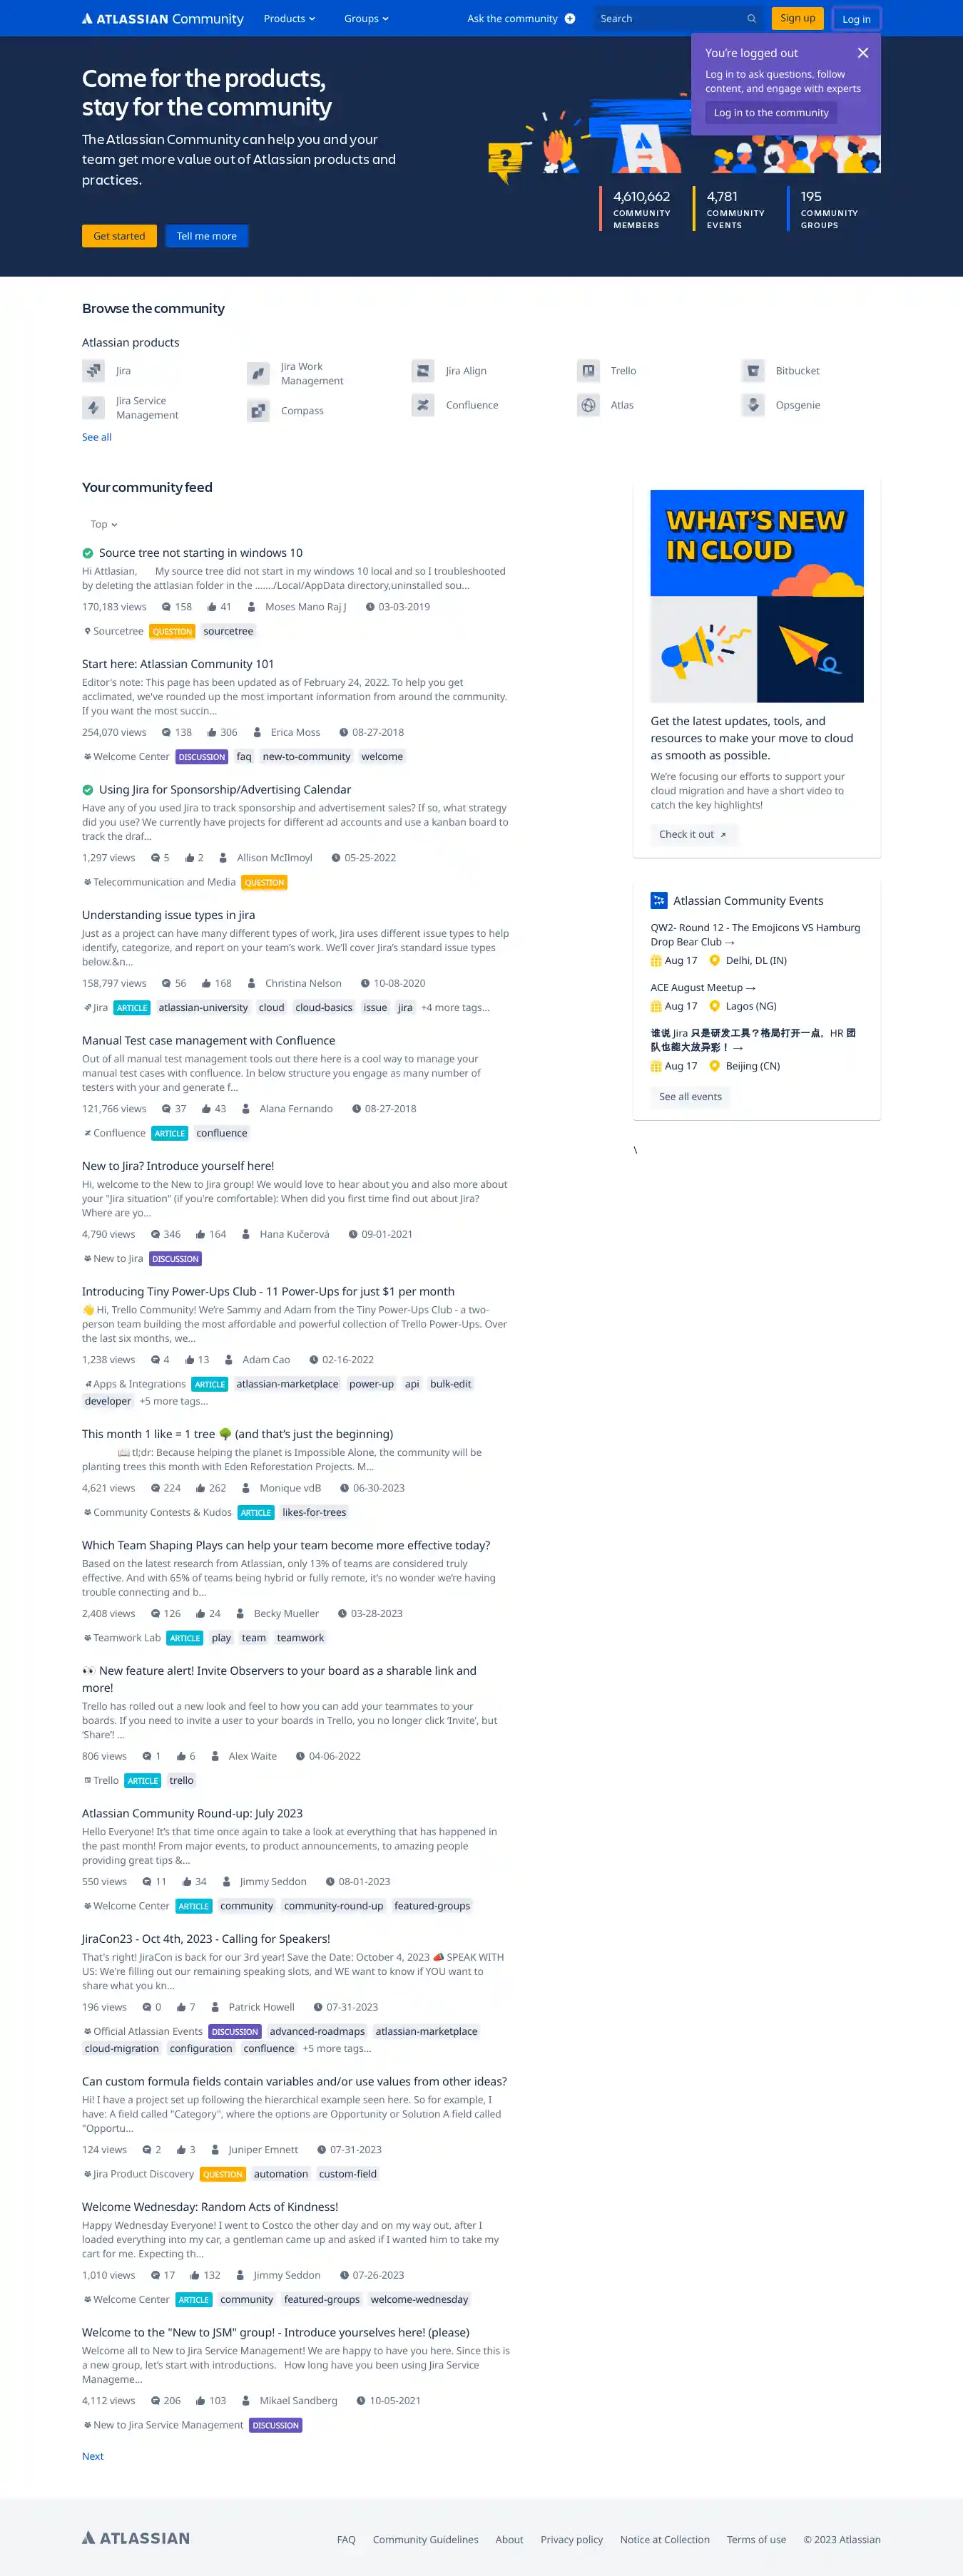
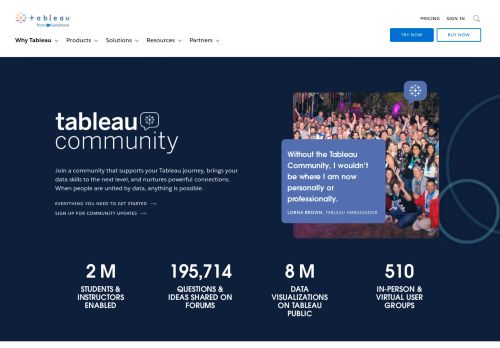
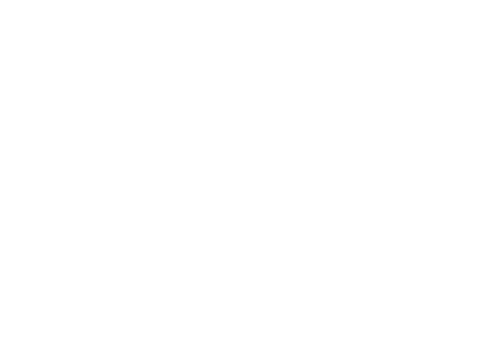
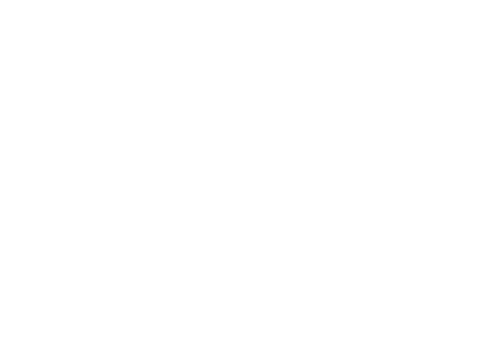
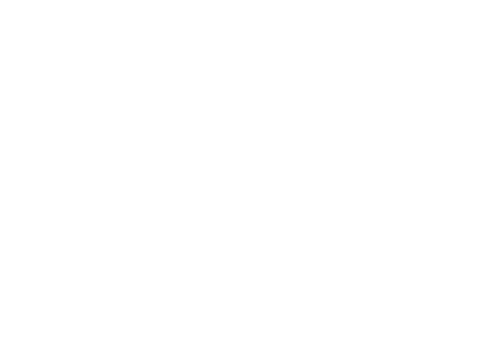
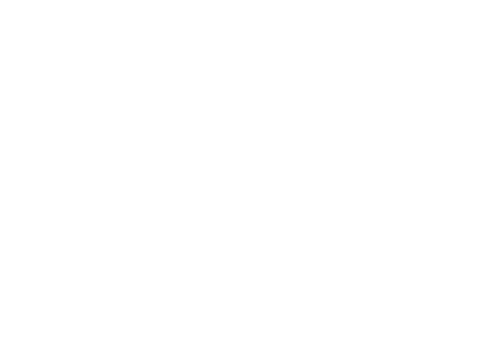
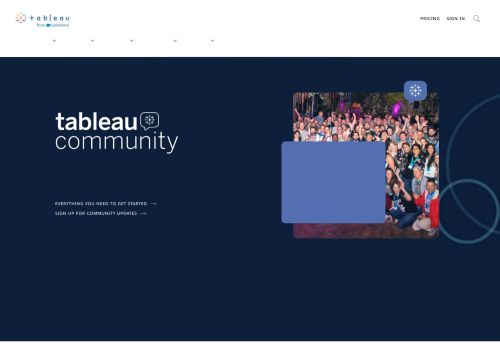
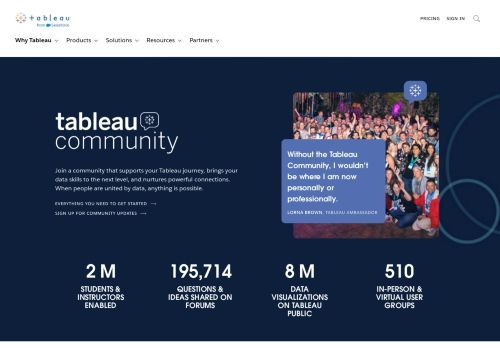
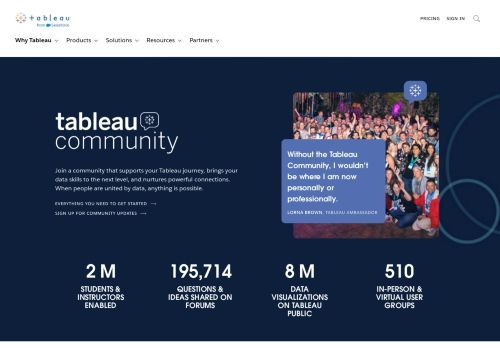
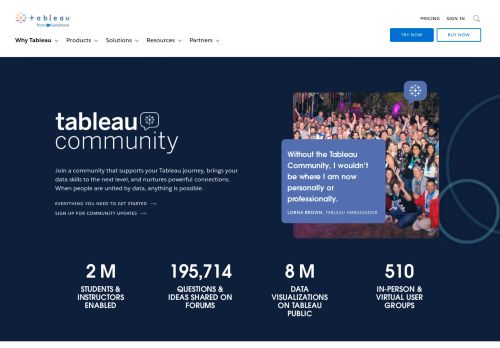
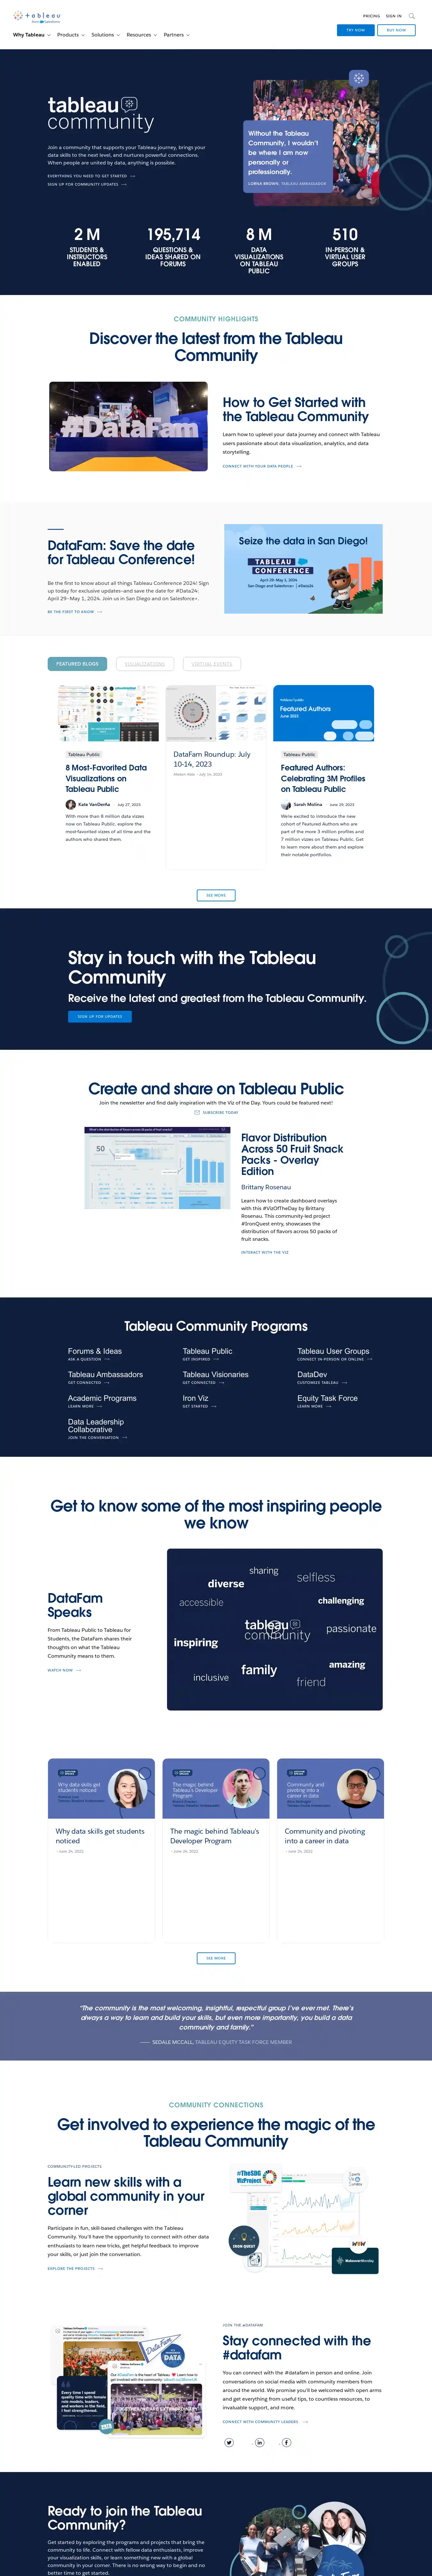

In [23]:
import openpyxl
import pandas as pd
import requests
from openpyxl import Workbook
from openpyxl.styles import PatternFill

def load_from_storage():
    try:
        with open('api_key.txt') as api_key:
            token = api_key.read().strip()
            return token
    except FileNotFoundError:
        print('No API key found, continuing without..')
        return None

token = load_from_storage()

#with open('pagespeed.txt') as pagespeedurls:
#    urls = [line.strip() for line in pagespeedurls]

urls = [
    "https://community.infineon.com",
    "https://community.nxp.com",
    "https://community.st.com",
    "https://e2e.ti.com",
    "https://forum.microchip.com",
    "https://devzone.nordicsemi.com",
    "https://stackoverflow.com",
    "https://community.cisco.com/",
    "https://community.atlassian.com/",
    "https://www.tableau.com/community"
]

data_list = []  # List to store data as dictionaries

for url in urls:
    if token is not None:
        api_url = f'https://www.googleapis.com/pagespeedonline/v5/runPagespeed?url={url}&strategy=desktop&key={token}'
    else:
        api_url = f'https://www.googleapis.com/pagespeedonline/v5/runPagespeed?url={url}&strategy=desktop'

    print(f'Requesting {api_url}...')
    response = requests.get(api_url)
    data = response.json()
    print(data)


    try:


        urlid = data['id'].split('?')[0]

        # Metrics from Lighthouse

        LCP = float(data["loadingExperience"]["metrics"]["LARGEST_CONTENTFUL_PAINT_MS"]["percentile"])/1000
        FID = float(data["loadingExperience"]["metrics"]["FIRST_INPUT_DELAY_MS"]["percentile"])
        CLS = float(data["loadingExperience"]["metrics"]["CUMULATIVE_LAYOUT_SHIFT_SCORE"]["percentile"])/100
        FCP = float(data["loadingExperience"]["metrics"]["FIRST_CONTENTFUL_PAINT_MS"]["percentile"])/1000
        INP = float(data['loadingExperience']['metrics']['INTERACTION_TO_NEXT_PAINT']['percentile'])
        TTI = data["lighthouseResult"]["audits"]["interactive"]["displayValue"]
        TBT = data["lighthouseResult"]["audits"]["total-blocking-time"]["displayValue"]
        TTFB = float(data["loadingExperience"]["metrics"]["EXPERIMENTAL_TIME_TO_FIRST_BYTE"]["percentile"])/1000
        performance_score = float(data['lighthouseResult']['categories']['performance']['score'])*100

        row = {
            'URL': urlid,
            'Largest Contentful Paint (LCP)': f'{LCP:.2f} s',
            'First Input Delay': f'{FID:.2f} ms',
            'Cumulative Layout Shift (CLS)': f'{CLS:.2f}',
            'First Contentful Paint  (FCP)': f'{FCP:.2f} s',
            'Interaction to Next Paint (INP)' : f'{INP:.2f} ms',
            'Time To Interactive (TTI)': TTI,
            'Total Blocking Time (TBT)': TBT,
            'Time to first Byte (TTFB)' : f'{TTFB:.2f} s',
            'Performance':  f'{performance_score:.2f} %'

        }

        data_list.append(row)

        print('row:', row)
        print(f'Performance: {performance_score}')
    except KeyError as e:
        print(f'<KeyError> One or more keys not found {url}. Error: {e}')
    except Exception as e:
        print(f'<Error> Failed to process {url}. Error: {e}')

# Create the DataFrame after the loop is completed
results = pd.DataFrame(data_list)

df = pd.DataFrame(data_list)
#results_transposed = results.transpose()
#results_transposed.to_csv('pagespeed-results-swapped.csv', header=False)

results.reset_index(drop=True, inplace=True)
benchmark_values = ['Benchmark', '< 2.5 s', '< 100 ms', '< 0.1', '< 1.8 s', '< 200 ms', '< 5 s', '< 200 ms','< 0.8 s','> = 75%']
results = pd.concat([pd.DataFrame([benchmark_values], columns=results.columns), results])
results_transposed = results.transpose()
print(results_transposed)
results_transposed.to_excel('Pagespeed_CommunityPerformance.xlsx')

excel_file_path = 'Pagespeed_CommunityPerformance.xlsx'
workbook = openpyxl.load_workbook(excel_file_path)
worksheet = workbook.active
worksheet.delete_rows(0)
modified_excel_file_path = 'Pagespeed_CommunityPerformance.xlsx'
workbook.save(modified_excel_file_path)#

In [26]:
# Load the Excel file
import openpyxl

excel_file_path = 'Pagespeed_CommunityPerformance.xlsx'
workbook = openpyxl.load_workbook(excel_file_path)
worksheet = workbook.active
worksheet.delete_rows(0)
modified_excel_file_path = 'Pagespeed_CommunityPerformance.xlsx'
workbook.save(modified_excel_file_path)

In [6]:
results.head(5)

URL Largest Contentful Paint (LCP)  \
0                        Benchmark                        < 2.5 s   
0  https://community.infineon.com/                         3.22 s   
1       https://community.nxp.com/                         2.22 s   
2        https://community.st.com/                         2.06 s   
3              https://e2e.ti.com/                         2.88 s   

  First Input Delay Cumulative Layout Shift (CLS)  \
0          < 100 ms                         < 0.1   
0           2.00 ms                          0.04   
1           2.00 ms                          0.00   
2           2.00 ms                          0.02   
3           2.00 ms                          0.09   

  First Contentful Paint  (FCP) Interaction to Next Paint (INP)  \
0                       < 1.8 s                        < 200 ms   
0                        2.42 s                        45.00 ms   
1                        2.15 s                       202.00 ms   
2                        1.92 s                        38.00 ms   
3                        2.72 s                        61.00 ms   

  Time To Interactive (TTI) Total Blocking Time (TBT)  \
0                     < 5 s                  < 200 ms   
0                     7.2 s                    120 ms   
1                     2.3 s                    120 ms   
2                     3.4 s                    140 ms   
3                     2.6 s                     30 ms   

  Time to first Byte (TTFB) Performance  
0                   < 0.8 s     > = 75%  
0                    1.99 s     58.00 %  
1                    1.73 s     90.00 %  
2                    1.46 s     92.00 %  
3                    1.95 s     68.00 %

In [14]:
formatted_output = results_transposed.iloc[1:]
formatted_output.to_excel('Pagespeed_CommunityPerformance.xlsx')

                               URL Largest Contentful Paint (LCP)  \
1  https://community.infineon.com/                         3.22 s   
2       https://community.nxp.com/                         2.22 s   
3        https://community.st.com/                         2.06 s   
4              https://e2e.ti.com/                         2.88 s   

  First Input Delay Cumulative Layout Shift (CLS)  \
1           2.00 ms                          0.04   
2           2.00 ms                          0.00   
3           2.00 ms                          0.02   
4           2.00 ms                          0.09   

  First Contentful Paint  (FCP) Interaction to Next Paint (INP)  \
1                        2.42 s                        45.00 ms   
2                        2.15 s                       202.00 ms   
3                        1.92 s                        38.00 ms   
4                        2.72 s                        61.00 ms   

  Time To Interactive (TTI) Total Blocking Time (TBT

0                                0  \
URL                              Benchmark  https://community.infineon.com/   
Largest Contentful Paint (LCP)     < 2.5 s                           3.22 s   
First Input Delay                 < 100 ms                          2.00 ms   
Cumulative Layout Shift (CLS)        < 0.1                             0.04   
First Contentful Paint  (FCP)      < 1.8 s                           2.42 s   
Interaction to Next Paint (INP)   < 200 ms                         45.00 ms   
Time To Interactive (TTI)            < 5 s                            7.2 s   
Total Blocking Time (TBT)         < 200 ms                           120 ms   
Time to first Byte (TTFB)          < 0.8 s                           1.99 s   
Performance                        > = 75%                          58.00 %   

                                                          1  \
URL                              https://community.nxp.com/   
Largest Contentful Paint (LCP)                       2.22 s   
First Input Delay                                   2.00 ms   
Cumulative Layout Shift (CLS)                          0.00   
First Contentful Paint  (FCP)                        2.15 s   
Interaction to Next Paint (INP)                   202.00 ms   
Time To Interactive (TTI)                             2.3 s   
Total Blocking Time (TBT)                            120 ms   
Time to first Byte (TTFB)                            1.73 s   
Performance                                         90.00 %   

                                                         2  \
URL                              https://community.st.com/   
Largest Contentful Paint (LCP)                      2.06 s   
First Input Delay                                  2.00 ms   
Cumulative Layout Shift (CLS)                         0.02   
First Contentful Paint  (FCP)                       1.92 s   
Interaction to Next Paint (INP)                   38.00 ms   
Time To Interactive (TTI)                            3.4 s   
Total Blocking Time (TBT)                           140 ms   
Time to first Byte (TTFB)                           1.46 s   
Performance                                        92.00 %   

                                                   3  
URL                              https://e2e.ti.com/  
Largest Contentful Paint (LCP)                2.88 s  
First Input Delay                            2.00 ms  
Cumulative Layout Shift (CLS)                   0.09  
First Contentful Paint  (FCP)                 2.72 s  
Interaction to Next Paint (INP)             61.00 ms  
Time To Interactive (TTI)                      2.6 s  
Total Blocking Time (TBT)                      30 ms  
Time to first Byte (TTFB)                     1.95 s  
Performance                                  68.00 %